## 0. MISE EN PLACE

 Nous commençons par mettre en place notre cadre de travail en effectuant les actions suivantes :
 - Importation des librairies et packages Python nécessaires
 - Importation des fonctions utiles implémentées 
 - Chargement du jeu de données


___
### 0.1 Importation des librairies Python nécessaires

In [1]:
import pandas as pd
import numpy as np
import random
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

___
### 0.2 Importation des fonctions utiles

Par soucis de clarté (lisibilité) et afin d'assurer un meilleur confort de lecture de ce notebook, les fonctions implémentées pour la manipulation des données et la réalisation des graphiques ont été regroupées dans le fichier project_functions.py.

Ces fonctions sont importées via la ligne de code ci-dessous:

In [2]:
import project_functions as pf

___
### 0.3 Chargement du jeu de données

In [3]:
data_file = pd.read_csv('./DataSet/EdStatsData.csv')
series_file = pd.read_csv('./DataSet/EdStatsSeries.csv')
country_file = pd.read_csv('./DataSet/EdStatsCountry.csv')
country_series_file = pd.read_csv('./DataSet/EdStatsCountry-Series.csv')
footnote_file = pd.read_csv('./DataSet/EdStatsFootnote.csv')

## 1. DESCRIPTION DU JEU DE DONNEES

Analyse générale et découverte des fichiers

___
### 1.1 Fichier EdStatsData.csv

In [4]:
data_file.head() #Affiche le contenu des 5 premières lignes du fichier

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  2060  \
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  ...   NaN   

   2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

In [5]:
data_file.describe() #Affiche des statistiques basiques sur le fichier

1970          1971          1972          1973          1974  \
count  7.228800e+04  3.553700e+04  3.561900e+04  3.554500e+04  3.573000e+04   
mean   1.974772e+09  4.253638e+09  4.592365e+09  5.105006e+09  5.401493e+09   
std    1.211687e+11  1.804814e+11  1.914083e+11  2.059170e+11  2.112150e+11   
min   -1.435564e+00 -1.594625e+00 -3.056522e+00 -4.032582e+00 -4.213563e+00   
25%    8.900000e-01  8.853210e+00  9.240920e+00  9.595200e+00  9.861595e+00   
50%    6.317724e+00  6.316240e+01  6.655139e+01  6.969595e+01  7.087760e+01   
75%    6.251250e+01  5.655200e+04  5.863650e+04  6.202900e+04  6.383675e+04   
max    1.903929e+13  1.986457e+13  2.100916e+13  2.238367e+13  2.282991e+13   

               1975          1976          1977          1978          1979  \
count  8.730600e+04  3.748300e+04  3.757400e+04  3.757600e+04  3.680900e+04   
mean   2.314288e+09  5.731808e+09  6.124437e+09  6.671489e+09  7.436724e+09   
std    1.375059e+11  2.215546e+11  2.325489e+11  2.473986e+11  2.660957e+11   
min   -3.658569e+00 -2.950945e+00 -3.174870e+00 -3.558749e+00 -2.973612e+00   
25%    1.400000e+00  9.312615e+00  9.519913e+00  1.000000e+01  1.000000e+01   
50%    9.677420e+00  7.101590e+01  7.133326e+01  7.290512e+01  7.510173e+01   
75%    7.854163e+01  5.682800e+04  5.739175e+04  5.940425e+04  6.411500e+04   
max    2.300634e+13  2.424128e+13  2.521383e+13  2.622101e+13  2.730873e+13   

       ...          2060          2065          2070          2075  \
count  ...  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04   
mean   ...  7.224868e+02  7.271290e+02  7.283779e+02  7.266484e+02   
std    ...  2.215845e+04  2.287990e+04  2.352338e+04  2.408149e+04   
min    ... -1.630000e+00 -1.440000e+00 -1.260000e+00 -1.090000e+00   
25%    ...  3.000000e-02  3.000000e-02  2.000000e-02  2.000000e-02   
50%    ...  2.300000e-01  2.300000e-01  2.300000e-01  2.300000e-01   
75%    ...  7.505000e+00  7.500000e+00  7.300000e+00  7.100000e+00   
max    ...  2.951569e+06  3.070879e+06  3.169711e+06  3.246239e+06   

               2080          2085          2090          2095          2100  \
count  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04  5.143600e+04   
mean   7.228327e+02  7.176899e+02  7.113072e+02  7.034274e+02  6.940296e+02   
std    2.455897e+04  2.496587e+04  2.530183e+04  2.556069e+04  2.574189e+04   
min   -9.200000e-01 -7.800000e-01 -6.500000e-01 -5.500000e-01 -4.500000e-01   
25%    1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02   
50%    2.300000e-01  2.300000e-01  2.300000e-01  2.300000e-01  2.200000e-01   
75%    6.722500e+00  6.080000e+00  5.462500e+00  4.680000e+00  4.032500e+00   
max    3.301586e+06  3.337871e+06  3.354746e+06  3.351887e+06  3.330484e+06   

       Unnamed: 69  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 66 columns]

In [6]:
data_file.shape #Affiche le nombre de lignes et de colonnes du fichier

(886930, 70)

In [7]:
print ("Nombre de valeurs uniques de la colonne Country Name = ",data_file["Country Name"].nunique())
data_file["Country Name"].unique() #liste les valeurs uniques de la colonne "Country Name"

Nombre de valeurs uniques de la colonne Country Name =  242


array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


In [8]:
print ("Nombre de valeurs uniques de la colonne Indicator Name = ",data_file["Indicator Name"].nunique())

Nombre de valeurs uniques de la colonne Indicator Name =  3665


**Observations**
- Taille : **886 930 lignes, 70 colonnes** 
- Données **depuis 1970 et projections jusqu'en 2100**
- **242 valeurs uniques dans la colonne "Contry Name"** ce qui laisserait penser que les données concerneraient 242 Pays. Cependant, selon l’Organisation des Nations unies (ONU) il y'a 197 pays dans le monde. Après inspection de cette colonne, j'ai pu constater en effet qu'elle contenait aussi des noms de groupement de pays. Exemple : "Arab World" qui désigne un ensemble de pays couvrant l'Arabie, l'Afrique du Nord et le Proche-Orient, ayant en commun la langue arabe et une culture arabe. Cette façon de lister les pays respecte la norme ISO 3166-1.
-  **3665 indicateurs** différents
- Beaucoup de valeurs NaN
- La dernière colonne est assez intrigante (nommée "Unnamed:69" avec des valeurs NaN partout) 
- **Ce fichier donne l’évolution (au fil des années) de nombreux indicateurs pour tous les pays et certains groupes de pays (zones géographiques)**


___
### 1.2 Fichier EdStatsSeries.csv

In [9]:
series_file.head() #Affiche le contenu des 5 premières lignes du fichier

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   
3  Percentage of population age 15+ with no educa...              NaN   
4  Percentage of female population age 20-24 with...              NaN   

  Periodicity Base Period Other notes Aggregation method  ...  \
0         NaN         NaN         NaN                NaN  ...   
1         NaN         NaN         NaN                NaN  ...   
2         NaN         NaN         NaN                NaN  ...   
3         NaN         NaN         NaN                NaN  ...   
4         NaN         NaN         NaN                NaN  ...   

  Notes from original source  General comments  \
0                        NaN               NaN   
1                        NaN               NaN   
2                        NaN               NaN   
3                        NaN               NaN   
4                        NaN               NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   
3  Robert J. Barro and Jong-Wha Lee: http://www.b...   
4  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   

  Related source links Other web links  Related indicators  License Type  \
0                  NaN             NaN                 NaN           NaN   
1                  NaN             NaN                 NaN           NaN   
2                  NaN             NaN                 NaN           NaN   
3                  NaN             NaN                 NaN           NaN   
4                  NaN             NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 21 columns]

In [10]:
series_file.shape #Affiche le nombre de lignes et de colonnes du fichier

(3665, 21)

In [11]:
print ("Nombre de valeurs uniques de la colonne Indicator Name = ",series_file["Indicator Name"].nunique())

Nombre de valeurs uniques de la colonne Indicator Name =  3665


In [12]:
print ("Nombre de valeurs uniques de la colonne Topic = ",series_file["Topic"].nunique())

Nombre de valeurs uniques de la colonne Topic =  37


In [13]:
series_file["Topic"].unique() #Affiche la liste des Topics

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

**Observations**
- Taille : **3665 lignes, 21 colonnes** 
- **3665 indicateurs** différents et uniques (le nombre d'indicateurs correpond au nombre de ligne du fichier)
- **37 Topics (sujets)** différents 
- Beaucoup de valeurs NaN (certaines colonnes sont entièrement vides et la dernière colonne a un nom atypique "Unnamed:20")
- le nom de la colonne correspondant au code de l'indicateur est nommé différement que dans EdStatsData ("Series Code" au lieu de "Indicator Code")
- **Ce fichier contient des informations sur les indicateurs regroupés par sujets (topics)**


___
### 1.3 Fichier EdStatsCountry.csv

In [14]:
country_file.head() #Affiche le contenu des 5 premières lignes du fichier

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   
3           AL    Albanian lek   
4           AD            Euro   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   
2         Sub-Saharan Africa   Upper middle income        AO  ...   
3      Europe & Central Asia   Upper middle income        AL  ...   
4      Europe & Central Asia  High income: nonOECD        AD  ...   

            IMF data dissemination standard  \
0                                       NaN   
1  General Data Dissemination System (GDDS)   
2  General Data Dissemination System (GDDS)   
3  General Data Dissemination System (GDDS)   
4                                       NaN   

                            Latest population census  \
0                                               2010   
1                                               1979   
2                                               1970   
3                                               2011   
4  2011. Population figures compiled from adminis...   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   
3       Demographic and Health Survey (DHS), 2008/09   
4                                                NaN   

   Source of most recent Income and expenditure data  \
0                                                NaN   
1            Integrated household survey (IHS), 2008   
2            Integrated household survey (IHS), 2008   
3  Living Standards Measurement Study Survey (LSM...   
4                                                NaN   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   
3                         Yes                       2012   
4                         Yes                        NaN   

  Latest industrial data Latest trade data Latest water withdrawal data  \
0                    NaN            2012.0                          NaN   
1                    NaN            2012.0                         2000   
2                    NaN               NaN                         2005   
3                 2010.0            2012.0                         2006   
4                    NaN            2006.0                          NaN   

  Unnamed: 31  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 32 columns]

In [15]:
country_file.shape #Affiche le nombre de lignes et de colonnes du fichier

(241, 32)

In [16]:
print ("Nombre de valeurs uniques de la colonne Country Code = ",country_file["Country Code"].nunique())

Nombre de valeurs uniques de la colonne Country Code =  241


In [17]:
print ("Nombre de valeurs uniques de la colonne Region = ",country_file["Region"].nunique())

Nombre de valeurs uniques de la colonne Region =  7


In [18]:
country_file["Region"].dropna().unique() #Affiche la liste des régions

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [19]:
#Affiche le Country Name absent dans EdStatsCountry.csv mais présent dans EdStatsData.csv
absent_df = data_file[~data_file['Country Code'].isin(country_file['Country Code'].unique())][['Country Name']]
absent_df["Country Name"].unique()

array(['British Virgin Islands'], dtype=object)

**Observations**
- Taille : **241 lignes, 32 colonnes** 
- Les données pour le Country Name = "British Virgin Islands" sont présentes dans EdStatsData.csv mais absentes dans ce fichier (d'ou le 241 ou lieu de 242 comme dans EdStatsData.csv)
- Les pays et zones géographiques sont répartis en **7 régions** 
- Beaucoup de valeurs NaN
- La dernière colonne a un nom atypique "Unnamed:31" avec des NaN partout 
- **Ce fichier contient les informations globales sur l’économie de chaque pays (et zones géographiques) du monde**

___
### 1.4 Fichier EdStatsCountry-Series.csv

In [20]:
country_series_file.head() #Affiche le contenu des 5 premières lignes du fichier

CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN

In [21]:
country_series_file.shape #Affiche le nombre de lignes et de colonnes du fichier

(613, 4)

In [22]:
print ("Nombre de valeurs uniques de la colonne CountryCode = ",country_series_file["CountryCode"].nunique())

Nombre de valeurs uniques de la colonne CountryCode =  211


In [23]:
print ("Nombre de valeurs uniques de la colonne SeriesCode = ",country_series_file["SeriesCode"].nunique())

Nombre de valeurs uniques de la colonne SeriesCode =  21


**Observations**
- Taille : **613 lignes, 4 colonnes** 
- La dernière colonne a un nom atypique "Unnamed:3" avec des NaN partout 
- On note une différence d'écriture pour les colonnes "CountryCode" de "SeriesCode" par rapport aux autres fichiers (pas d'espace)
- **Ce fichier contient des informations supplémentaires sur la description des "sources" de 21 indicateurs pour 211 (pays/zone)**

___
### 1.5 Fichier EdStatsFootnote.csv

In [24]:
footnote_file.head() #Affiche le contenu des 5 premières lignes du fichier

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN

In [25]:
footnote_file.shape #Affiche le nombre de lignes et de colonnes du fichier

(643638, 5)

In [26]:
print ("Nombre de valeurs uniques de la colonne CountryCode = ",footnote_file["CountryCode"].nunique())

Nombre de valeurs uniques de la colonne CountryCode =  239


In [27]:
print ("Nombre de valeurs uniques de la colonne SeriesCode = ",footnote_file["SeriesCode"].nunique())

Nombre de valeurs uniques de la colonne SeriesCode =  1558


In [28]:
print ("Nombre de valeurs uniques de la colonne Year = ",footnote_file["Year"].nunique())

Nombre de valeurs uniques de la colonne Year =  56


**Observations**
- Taille : **643638 lignes, 5 colonnes** 
- La dernière colonne a un nom atypique "Unnamed:4" avec des NaN partout 
- On note une différence d'écriture pour les colonnes "CountryCode" de "SeriesCode" par rapport aux autres fichiers (pas d'espace)
- **Ce fichier contient des informations supplémentaires sur la description de 1558 indicateurs pour 239 (pays/zone) et pour 56 années différentes**

### Nombre de lignes dupliquées par fichier

In [29]:
pf.plotnombreDuplicationLignes({    'EdStatsData':           [data_file, "Données globales"],
                                    'EdStatsSeries':         [series_file, "Détail des indicateurs"],
                                    'EdStatsCountry':        [country_file, "Détail des pays étudiés"],
                                    'EdStatsCountry-Series': [country_series_file, "Description des 'sources' des indicateurs par pays"],
                                    'EdStatsFootnote':       [footnote_file,"Descrition des indicateurs par pays et selon les années"]
                                   })

Nom du fichier  Nb de duplications
1            EdStatsData                   0
2          EdStatsSeries                   0
3         EdStatsCountry                   0
4  EdStatsCountry-Series                   0
5        EdStatsFootnote                   0

___
### 1.6 Récapitulatif des observations faites

**EdStatsData.csv**
- Taille : **886 930 lignes, 70 colonnes** 
- Données **depuis 1970 et projections jusqu'en 2100**
- **242 valeurs uniques dans la colonne "Contry Name"** ce qui laisserait penser que les données concerneraient 242 Pays. Cependant, selon l’Organisation des Nations unies (ONU) il y'a 197 pays dans le monde. Après inspection de cette colonne, j'ai pu constater en effet qu'elle contenait aussi des noms de groupement de pays. Exemple : "Arab World" qui désigne un ensemble de pays couvrant l'Arabie, l'Afrique du Nord et le Proche-Orient, ayant en commun la langue arabe et une culture arabe. Cette façon de lister les pays respecte la norme ISO 3166-1.
-  **3665 indicateurs** différents
- Beaucoup de valeurs NaN
- Aucune de duplication
- La dernière colonne est assez intrigante (nommée "Unnamed:69" avec des valeurs NaN partout) 
- **Ce fichier donne l’évolution (au fil des années) de nombreux indicateurs pour tous les pays et certains groupes de pays (zones géographiques)**

**EdStatsSeries.csv**
- Taille : **3665 lignes, 21 colonnes** 
- **3665 indicateurs** différents et uniques (le nombre d'indicateurs correpond au nombre de ligne du fichier)
- **37 Topics (sujets)** différents 
- Beaucoup de valeurs NaN (certaines colonnes sont entièrement vides et la dernière colonne a un nom atypique "Unnamed:20")
- Aucune de duplication
- le nom de la colonne correspondant au code de l'indicateur est nommé différement que dans EdStatsData ("Series Code" au lieu de "Indicator Code")
- **Ce fichier contient des informations sur les indicateurs regroupés par sujets (topics)**

**EdStatsCountry.csv**
- Taille : **241 lignes, 32 colonnes** 
- Les données pour le Country Name = "British Virgin Islands" sont présentes dans EdStatsData.csv mais absentes dans ce fichier (d'ou le 241 ou lieu de 242 comme dans EdStatsData.csv)
- Les pays et zones géographiques sont répartis en **7 régions** 
- Beaucoup de valeurs NaN
- Aucune de duplication
- La dernière colonne a un nom atypique "Unnamed:31" avec des NaN partout 
- **Ce fichier contient les informations globales sur l’économie de chaque pays (et zones géographiques) du monde**

**EdStatsCountry-Series.csv**
- Taille : **613 lignes, 4 colonnes** 
- La dernière colonne a un nom atypique "Unnamed:3" avec des NaN partout 
- On note une différence d'écriture pour les colonnes "CountryCode" de "SeriesCode" par rapport aux autres fichiers (pas d'espace)
- Aucune de duplication
- **Ce fichier contient des informations supplémentaires sur la description des "sources" de 21 indicateurs pour 211 (pays/zone)**

**EdStatsFootnote.csv**
- Taille : **643638 lignes, 5 colonnes** 
- La dernière colonne a un nom atypique "Unnamed:4" avec des NaN partout 
- On note une différence d'écriture pour les colonnes "CountryCode" de "SeriesCode" par rapport aux autres fichiers (pas d'espace)
- Aucune de duplication
- **Ce fichier contient des informations supplémentaires sur la description de 1558 indicateurs pour 239 (pays/zone) et pour 56 années différentes**

La suite de l'analyse se focalisera sur 3 fichiers (ceux contenant les informations les plus utiles pour répondre à la problématique) à savoir:
<br>
   - **EdStatsData**: contient des informatins sur l’évolution (au fil des années) de nombreux indicateurs pour tous les pays/zone
   - **EdStatsSeries**: contient des informations sur les indicateurs regroupés par sujets (topics)
   - **EdStatsCountry**: contient informations globales sur l’économie de chaque pays/zone

## 2. PRE-SELECTION DES DONNEES PERTINENTES 

Dans cette partie, nous allons commencer par faire une pré-selection des données pertinentes en fonction de la problématique associée à l'entreprise.

**Rappels contexte et problématique:**

- Métier de l'entreprise: formation en ligne 
- Cible: public de niveau lycée et université
- Projet d'expansion à l'international
- Propecter de potentiels nouveaux marchés en analysant le jeu de données EdStats

**Quelques informations pour guider la selection des données pertinentes:**

- La période de temps couverte par les données s’étend de 1970 à 2100. <br>
- La vulgarisation du PC et de l'apprentisage en ligne date essentiellement des années 2000
- Au regard des problématiques posées, les sujets (topics) pertinents à explorer sont ceux liés aux aspects suivants: 
    * Démographie : population totale, par tranches d’âge 20-29 ans, voire autres tranches d’âge
    * Niveau éducation :  nombre et taux étudiants dans le secondaire et tertiaire
    * Déploiement internet : taux utilisation internet
    * Economique : PIB, PIB/habitant, niveau de revenu


___
### 2.1 Filtrage des données par Années et par Topic

Pour pré-selectionner les données nous allons examiner le taux de remplissage des données par années puis, nous examinerons la liste des topic pour ne garder que ceux qui sont pertinents par rapport à la problématique

___
#### 2.1.1 Proportion des valeurs renseignées par année

Text(0.5, 1.0, 'Proportion des valeurs renseignées par Année')

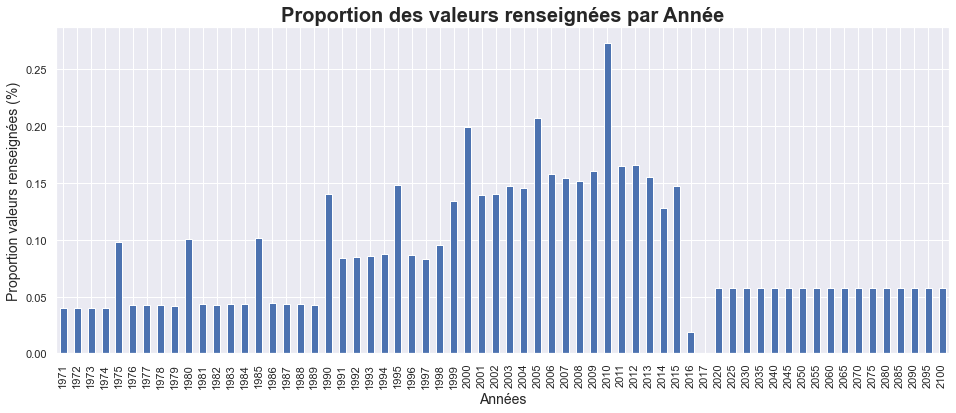

In [30]:
y = data_file.columns #Contient la liste de tous les noms de colonnes du fichier EdStatsData.csv
years = y[5:len(y)-1] #Contient uniquement les noms de colonnes représentant des années

sns.set(style="darkgrid")

(1 - data_file[years].isnull().mean()).plot.bar(figsize=(16,6))
plt.ylabel('Proportion valeurs renseignées (%)',fontsize=14)
plt.xlabel('Années', fontsize=14)
plt.title('Proportion des valeurs renseignées par Année', fontsize=20, fontweight='bold')


___
#### 2.1.2 Liste des "Topic" et nombre d'indicateurs par Topic

In [31]:
#Dataframe contenant le nombre d'indicateurs par Topic
topics_df = pd.DataFrame({ 'Nombre d\'indicateurs':series_file.groupby('Topic')['Series Code'].count()}).reset_index()
pd.set_option('display.max_colwidth', 150)
topics_df

Topic  \
0                                                                                     Attainment   
1                                                                                     Background   
2                                                                                           EMIS   
3                                                                Early Child Development (SABER)   
4                                                                      Early Childhood Education   
5                          Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita   
6   Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators   
7         Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators   
8                                                Economic Policy & Debt: Purchasing power parity   
9                                                                             Education Equality   
10                                              Education Management Information Systems (SABER)   
11                                                           Engaging the Private Sector (SABER)   
12                                                                                  Expenditures   
13                                                                             Health: Mortality   
14                                                                  Health: Population: Dynamics   
15                                                                 Health: Population: Structure   
16                                                                          Health: Risk factors   
17                                                                Infrastructure: Communications   
18                                                                                         Laber   
19                                                                             Learning Outcomes   
20                                                                                      Literacy   
21                                                                                    Population   
22                                                                   Post-Secondary/Non-Tertiary   
23                                                                                   Pre-Primary   
24                                                                                       Primary   
25                                                    School Autonomy and Accountability (SABER)   
26                                                                        School Finance (SABER)   
27                                                      School Health and School Feeding (SABER)   
28                                                                                     Secondary   
29                                              Social Protection & Labor: Labor force structure   
30                                                       Social Protection & Labor: Unemployment   
31                                                                    Student Assessment (SABER)   
32                                                                                      Teachers   
33                                                                              Teachers (SABER)   
34                                                                                      Tertiary   
35                                                                    Tertiary Education (SABER)   
36                                                                 Workforce Development (SABER)   

    Nombre d'indicateurs  
0                    733  
1                      2  
2                      2  
3                     12  
4                     24  
5                      1  
6                      2  
7                      3  
8                      6  
9                   

### Idées retenues

- La période 2000-2015 sera utilisée comme période représentative pour la partie descriptive de cette pré-analyse.
- La période 2020-2100 sera considérée pour des projections potentielles.
- Les indicateurs candidats intéressants qui seront pré-sélectionnés pour répondre le besoin métier sont ceux liés aux Topic (sujets) suivants:
    * **Attainment** : accès à l'éducation (niveau d'instruction)
    * **Economic Policy & Debt: National accounts: US at current prices: Aggregate indicators**: pouvoir d'achat
    * **Infrastructure: Communications**: utilisation d'internet
    * **Health: Population: Dynamics**: croissance de la population
    * **Health: Population: Structure**: structure de la population
    * **Population**: structure population / niveau scolaire
    * **Secondary**: niveau lycée
    * **Tertiary** : niveau université

___
### 2.2 Pré-selection effective et assamblage des données

Voici la liste des actions faites dans cette section:

- Suppression des colonnes [1970 - 1999]
- Suppression de toutes les lignes et colonnes entièrement vides (dans les dataframes des 3 fichiers séléctionnés)
- Harmonisation des noms de colonnes pour préparer des jointures
- Ajout de la notion de région à chaque ligne de la dataframe **data_file**.
  Jointure sur le code pays ("Country Code") entre data_file et country_file. 
  La nouvelle dataframe obtenue est nommé **region_data_file**
- Suppression des lignes dans region_data_file dont le champ "Region" est vide 
- Ajout de la notion Topic à chaque ligne de la dataframe region_ data_file.
  Jointure sur le code indicateur ("Indicator Code") entre region_data_file et series_file
  La nouvelle dataframe obtenue est nommé **topic_region_data_file**
- Restriction des données aux lignes dans topic_region_data_file correspondantes aux indicateurs appartenant à la liste des Topic pré-sélectionnés
- Séparation de la dataframe **topic_region_data_file** en 2 dataframes**
  * une dataframe représentant les données historiques (données sur la période 2000-2015)
  * une dataframe représentant les données de projection (données sur la période 2020-2100)

In [32]:
# Suppression des colonnes [1970 - 1999]
#-------------------------------------------------------------

data_file.drop(data_file.loc[:,'1970':'1999'].head(0).columns, axis=1, inplace=True)
data_file.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060',
       '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100',
       'Unnamed: 69'],
      dtype='object')

**Nettoyage et corrections**

In [33]:
# Suppression de toutes les lignes et colonnes entièrement vides
#-------------------------------------------------------------

data_file = data_file.dropna(how='all').dropna(how='all', axis=1)
series_file = series_file.dropna(how='all').dropna(how='all', axis=1)
country_file = country_file.dropna(how='all').dropna(how='all', axis=1)


In [34]:
# Harmonisation des noms de colonnes pour préparer des jointures
#-------------------------------------------------------------

columns_new_names = {"Series Code": "Indicator Code"}

series_file = series_file.rename(columns=columns_new_names)
series_file.columns



Index(['Indicator Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Periodicity', 'Base Period', 'Other notes',
       'Aggregation method', 'Limitations and exceptions', 'General comments',
       'Source', 'Statistical concept and methodology',
       'Development relevance', 'Related source links'],
      dtype='object')

**Jointures afin de regrouper les données à analyser dans un seul dataframe**

Ajout des colonnes "Region" et "Topic" à la dataframe data_file  

In [35]:
# Ajout de la notion de région à chaque ligne de la dataframe data_file
#    jointure sur le code pays entre data_file et country_file
#-------------------------------------------------------------

region_data_file = data_file.join(country_file[['Country Code', 'Region']].set_index('Country Code'), on='Country Code')
region_data_file.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060',
       '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100',
       'Region'],
      dtype='object')

In [36]:
# Suppression des lignes dont le champ "Region" est vide 
#-------------------------------------------------------------

region_data_file = region_data_file[region_data_file['Region'].notna()]

In [37]:
# Ajout de la notion Topic à chaque ligne de la dataframe region_ data_file
# jointure sur le code indicateur ("Indicator Code") entre 
# region_data_file et series_file
#-------------------------------------------------------------

topic_region_data_file = region_data_file.join(series_file[['Indicator Code','Topic']].set_index('Indicator Code'), 
                                         on='Indicator Code')
topic_region_data_file.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060',
       '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100',
       'Region', 'Topic'],
      dtype='object')

**Restriction des données aux lignes correspondantes aux indicateurs pré-sélectionnés**

In [38]:
#Liste des Topic pré-sélectionnés

pre_selected_topics = [
    'Attainment',
    'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
    'Health: Population: Dynamics',
    'Health: Population: Structure',
    'Infrastructure: Communications',
    'Population',
    'Secondary',
    'Tertiary',
]

In [39]:
#Nombre d'indicateurs associés aux Topic pré-sélectionnés

preselected_indicators = series_file.query('Topic == @pre_selected_topics')
print("Nombre d'indicateurs pré-sélectionnés = ", len(preselected_indicators))

Nombre d'indicateurs pré-sélectionnés =  1379


In [40]:
#-------------------------------------------------------------
# Restriction des données aux lignes dans topic_region_data_file
# correspondantes aux indicateurs pré-sélectionnés
#-------------------------------------------------------------

topic_region_data_file_df = topic_region_data_file.query('Topic == @pre_selected_topics')
topic_region_data_file_df.shape
topic_region_data_file_df.head()

Country Name Country Code  \
91625  Afghanistan          AFG   
91626  Afghanistan          AFG   
91627  Afghanistan          AFG   
91628  Afghanistan          AFG   
91633  Afghanistan          AFG   

                                                                Indicator Name  \
91625             Adjusted net enrolment rate, lower secondary, both sexes (%)   
91626                 Adjusted net enrolment rate, lower secondary, female (%)   
91627  Adjusted net enrolment rate, lower secondary, gender parity index (GPI)   
91628                   Adjusted net enrolment rate, lower secondary, male (%)   
91633             Adjusted net enrolment rate, upper secondary, both sexes (%)   

       Indicator Code  2000  2001  2002  2003  2004  2005  ...  2065  2070  \
91625      UIS.NERA.2   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
91626    UIS.NERA.2.F   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
91627  UIS.NERA.2.GPI   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
91628    UIS.NERA.2.M   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   
91633      UIS.NERA.3   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   

       2075  2080  2085  2090  2095  2100      Region      Topic  
91625   NaN   NaN   NaN   NaN   NaN   NaN  South Asia  Secondary  
91626   NaN   NaN   NaN   NaN   NaN   NaN  South Asia  Secondary  
91627   NaN   NaN   NaN   NaN   NaN   NaN  South Asia  Secondary  
91628   NaN   NaN   NaN   NaN   NaN   NaN  South Asia  Secondary  
91633   NaN   NaN   NaN   NaN   NaN   NaN  South Asia  Secondary  

[5 rows x 41 columns]

In [41]:
#Verifions si les colonnes "Region", "Topic" sont bien entièrement remplie 

print('Nombre de valeurs non renseignées de la colonne Region = ',topic_region_data_file_df['Region'].isnull().sum())
print('Nombre de valeurs non renseignées de la colonne Topic = ',topic_region_data_file_df['Topic'].isnull().sum())

#Nombre de lignes dupliquées
print('Nombre de lignes dupliquées = ',topic_region_data_file_df.duplicated().sum())

Nombre de valeurs non renseignées de la colonne Region =  0
Nombre de valeurs non renseignées de la colonne Topic =  0
Nombre de lignes dupliquées =  0


**Séparation des données en 2 dataframes**
le dataframe **topic_region_data_file_df** contient désormais l'ensemble des données à analyser pour la suite. Nous le séparons en 2 dataframes à savoir:
- un dataframe représentant les données historiques (données sur la période 2000-2015)
- un dataframe représentant les données de projection (données sur la période 2020-2100)

In [42]:
historical_data = pd.concat([topic_region_data_file_df.loc[:,:'Indicator Code'], 
                                   topic_region_data_file_df.loc[:,'2000':'2015'],
                                   topic_region_data_file_df.loc[:,'Region':]], 
                                   axis=1)

projection_data = pd.concat([topic_region_data_file_df.loc[:,:'Indicator Code'], 
                                   topic_region_data_file_df.loc[:,'2020':'2100'],
                                   topic_region_data_file_df.loc[:,'Region':]], 
                                   axis=1)

In [43]:
historical_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', 'Region',
       'Topic'],
      dtype='object')

In [44]:
projection_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060',
       '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100',
       'Region', 'Topic'],
      dtype='object')

___
## 3. ANALYSE DE LA QUALITE DES DONNEES PRE-SELECTIONNEES

Nous allons maintenant analyser la qualité des données contenues dans les 2 dataframes (historical_data, projection_data) en considérant pour chacun d'eux:
- le taux de valeurs manquantes pour chaque Région
- le taux de valeurs manquantes pour chaque Topic
- le taux de valeurs manquantes pour chaque Pays

___
### 3.1 Taux de remplissage de données par région

C:\Users\RaissaTomeba\Formation\project_functions.py:130: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(b.get_xticks(), size = Y_SIZE)
C:\Users\RaissaTomeba\Formation\project_functions.py:140: UserWarning: FixedFormatter should only be used together with FixedLocator
  c.set_xticklabels(c.get_xticks(), size = Y_SIZE)


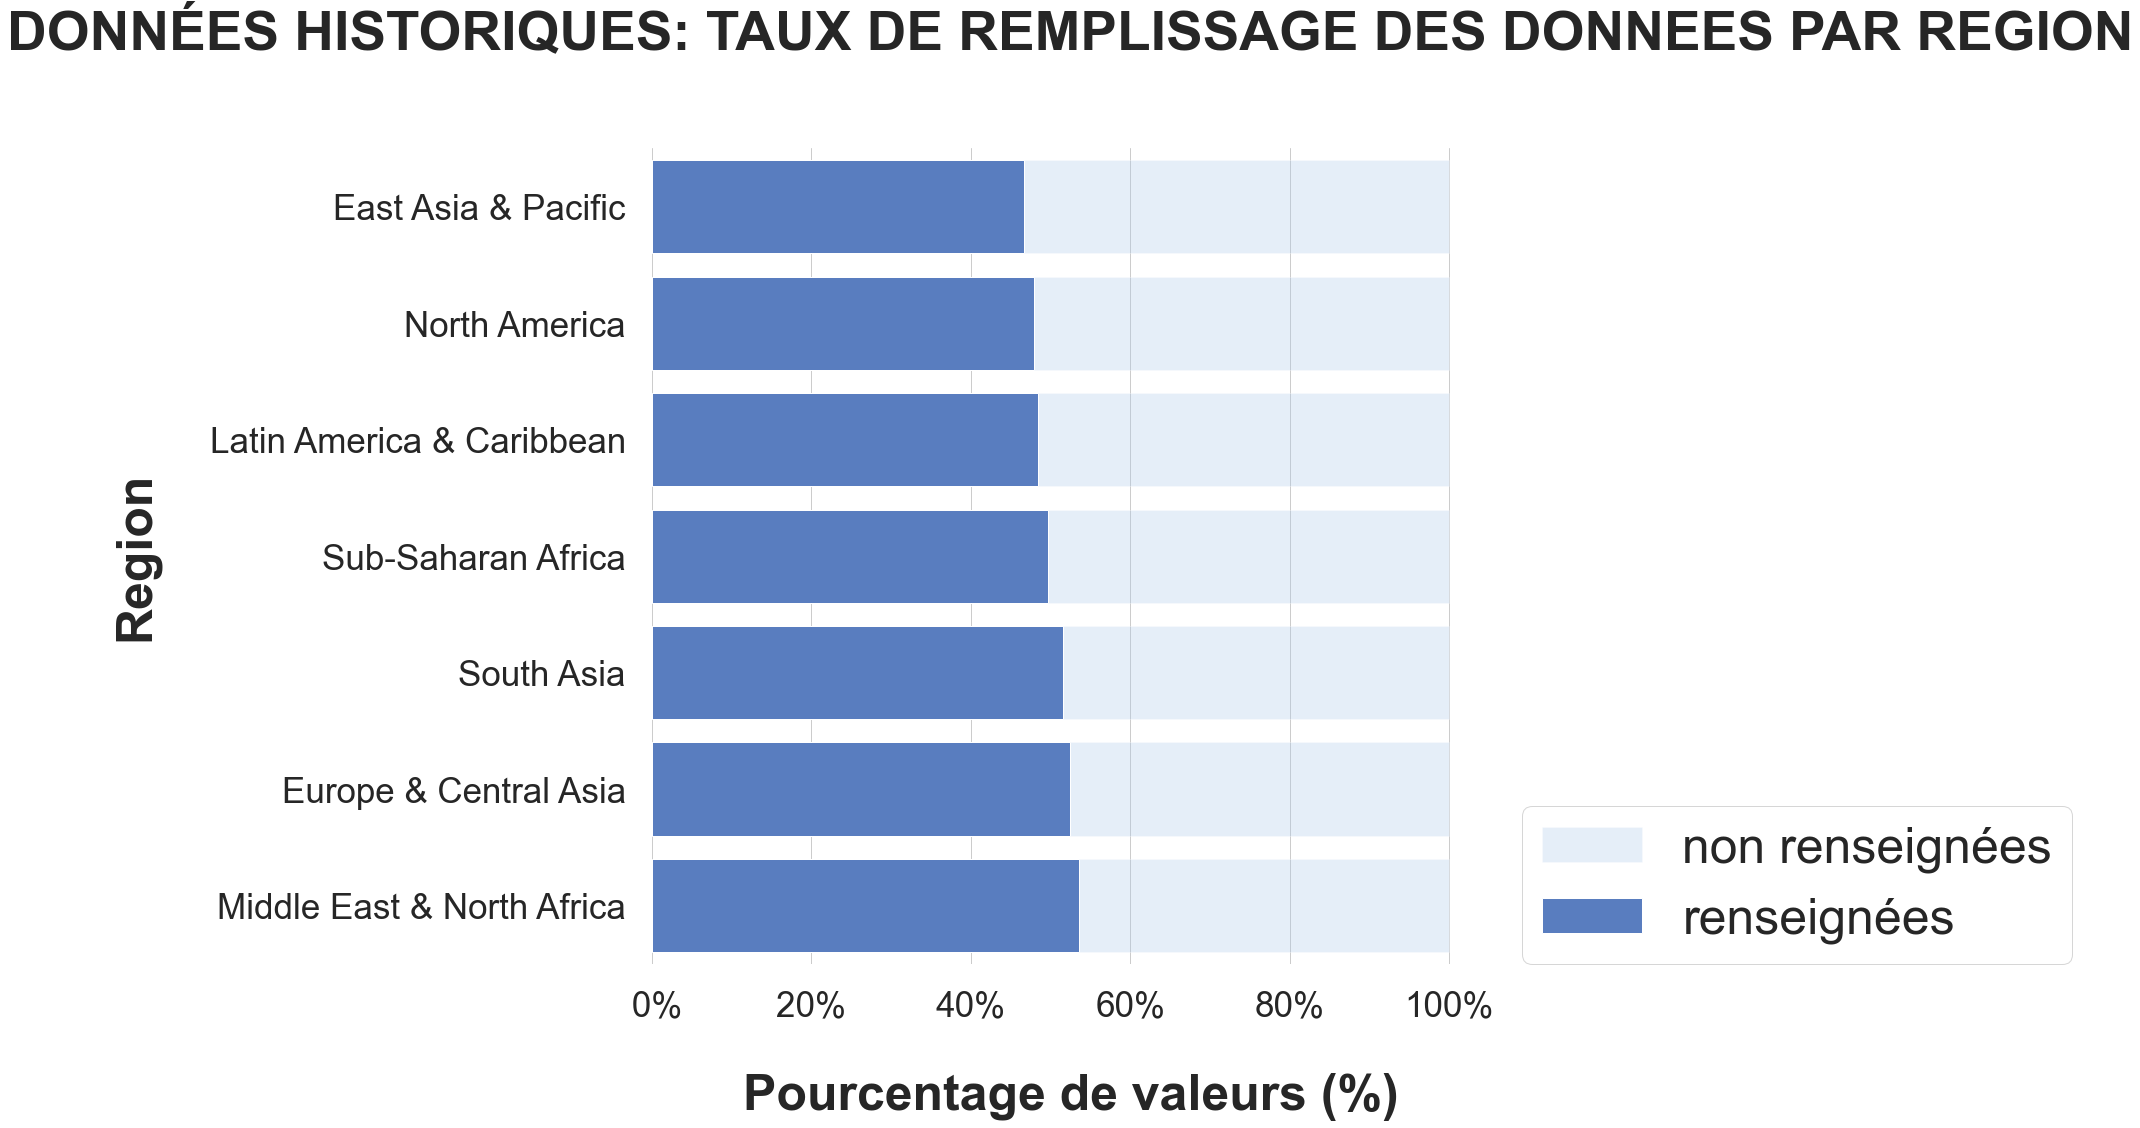

In [45]:
pf.plotTauxRemplissage(historical_data, "Region", 15, 15, "Données Historiques")

C:\Users\RaissaTomeba\Formation\project_functions.py:130: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(b.get_xticks(), size = Y_SIZE)
C:\Users\RaissaTomeba\Formation\project_functions.py:140: UserWarning: FixedFormatter should only be used together with FixedLocator
  c.set_xticklabels(c.get_xticks(), size = Y_SIZE)


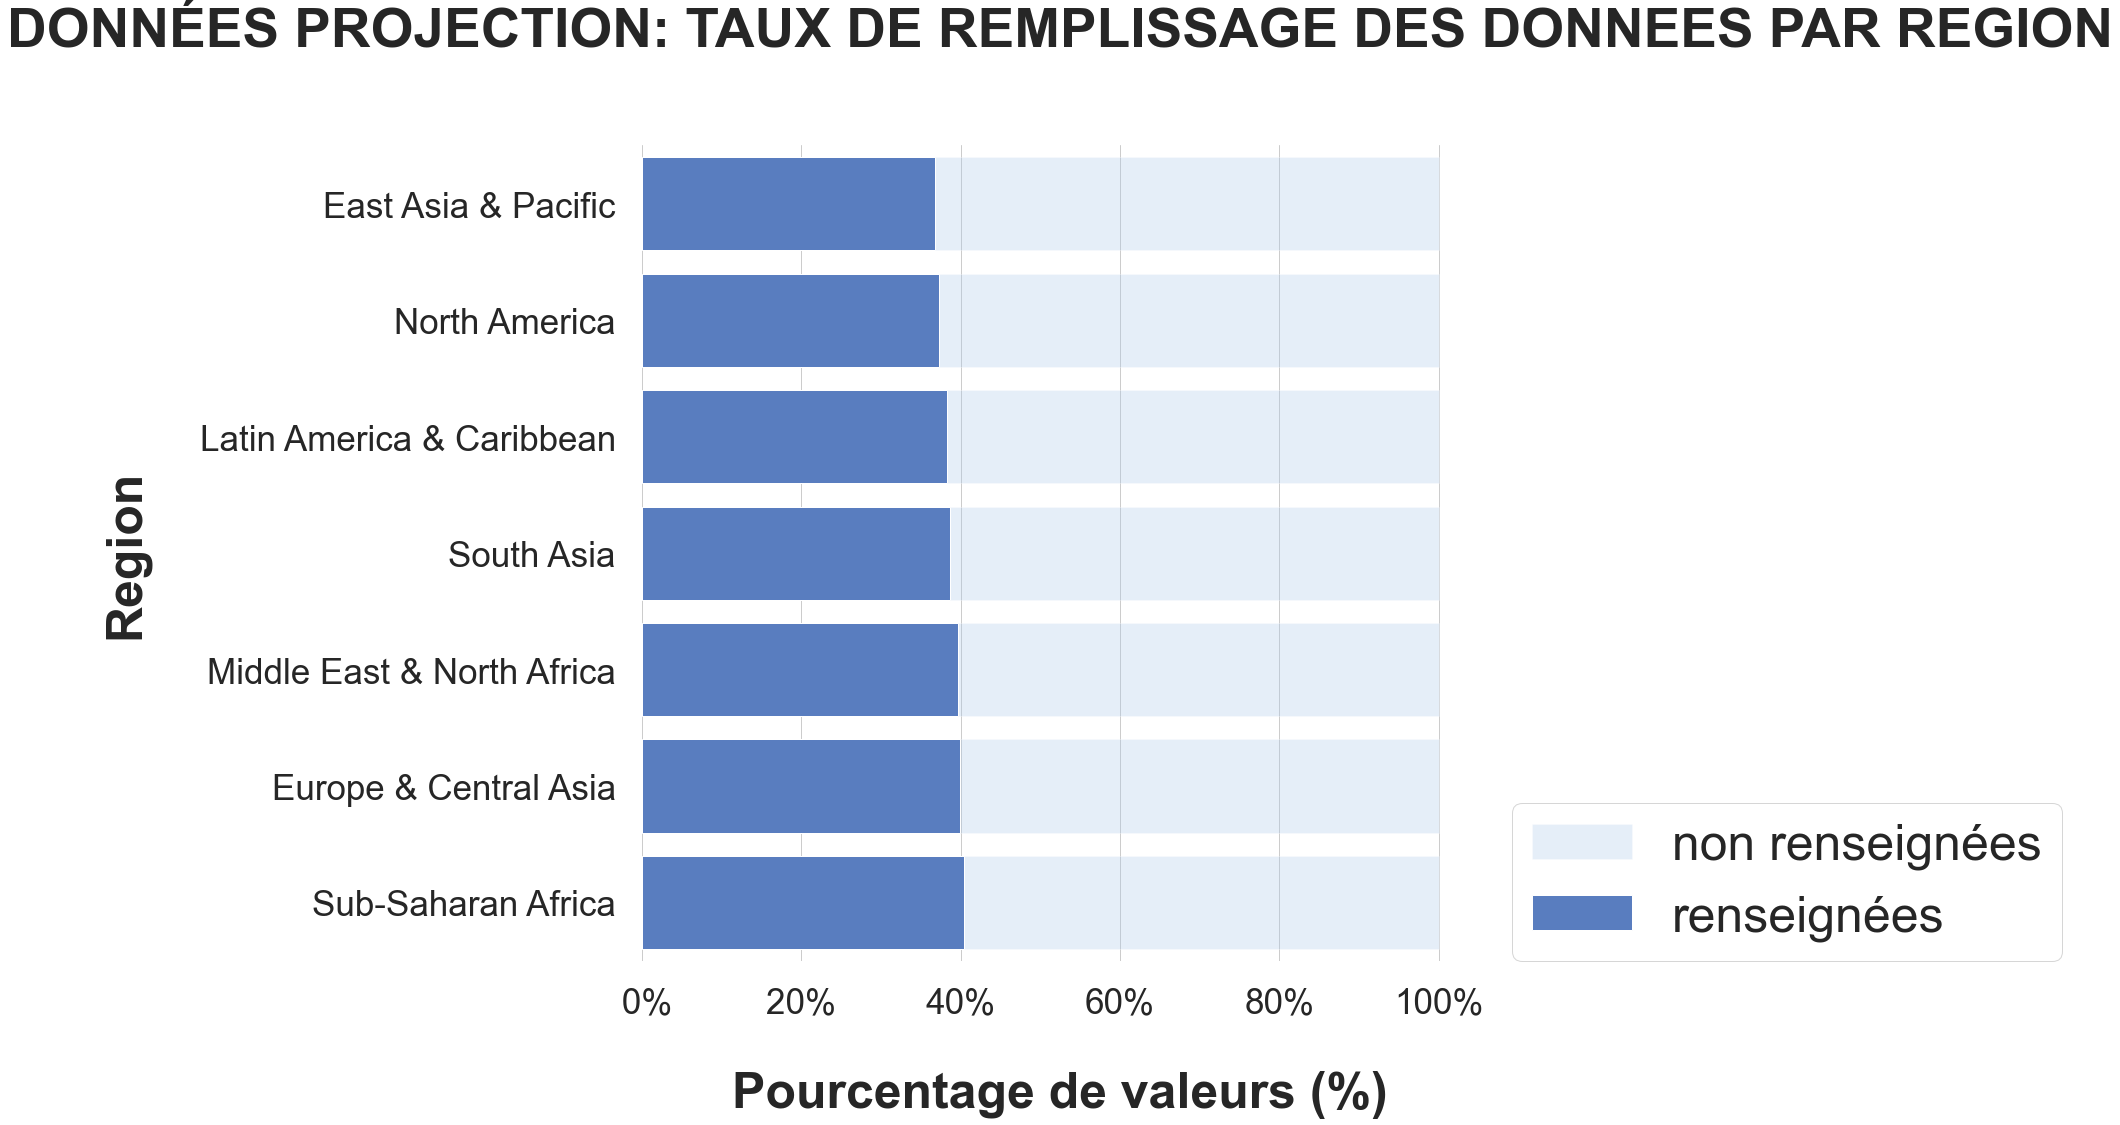

In [46]:
pf.plotTauxRemplissage(projection_data, "Region", 15, 15,"Données Projection")

___
### 3.2 Taux de remplissage de données par Topic

C:\Users\RaissaTomeba\Formation\project_functions.py:130: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(b.get_xticks(), size = Y_SIZE)
C:\Users\RaissaTomeba\Formation\project_functions.py:140: UserWarning: FixedFormatter should only be used together with FixedLocator
  c.set_xticklabels(c.get_xticks(), size = Y_SIZE)


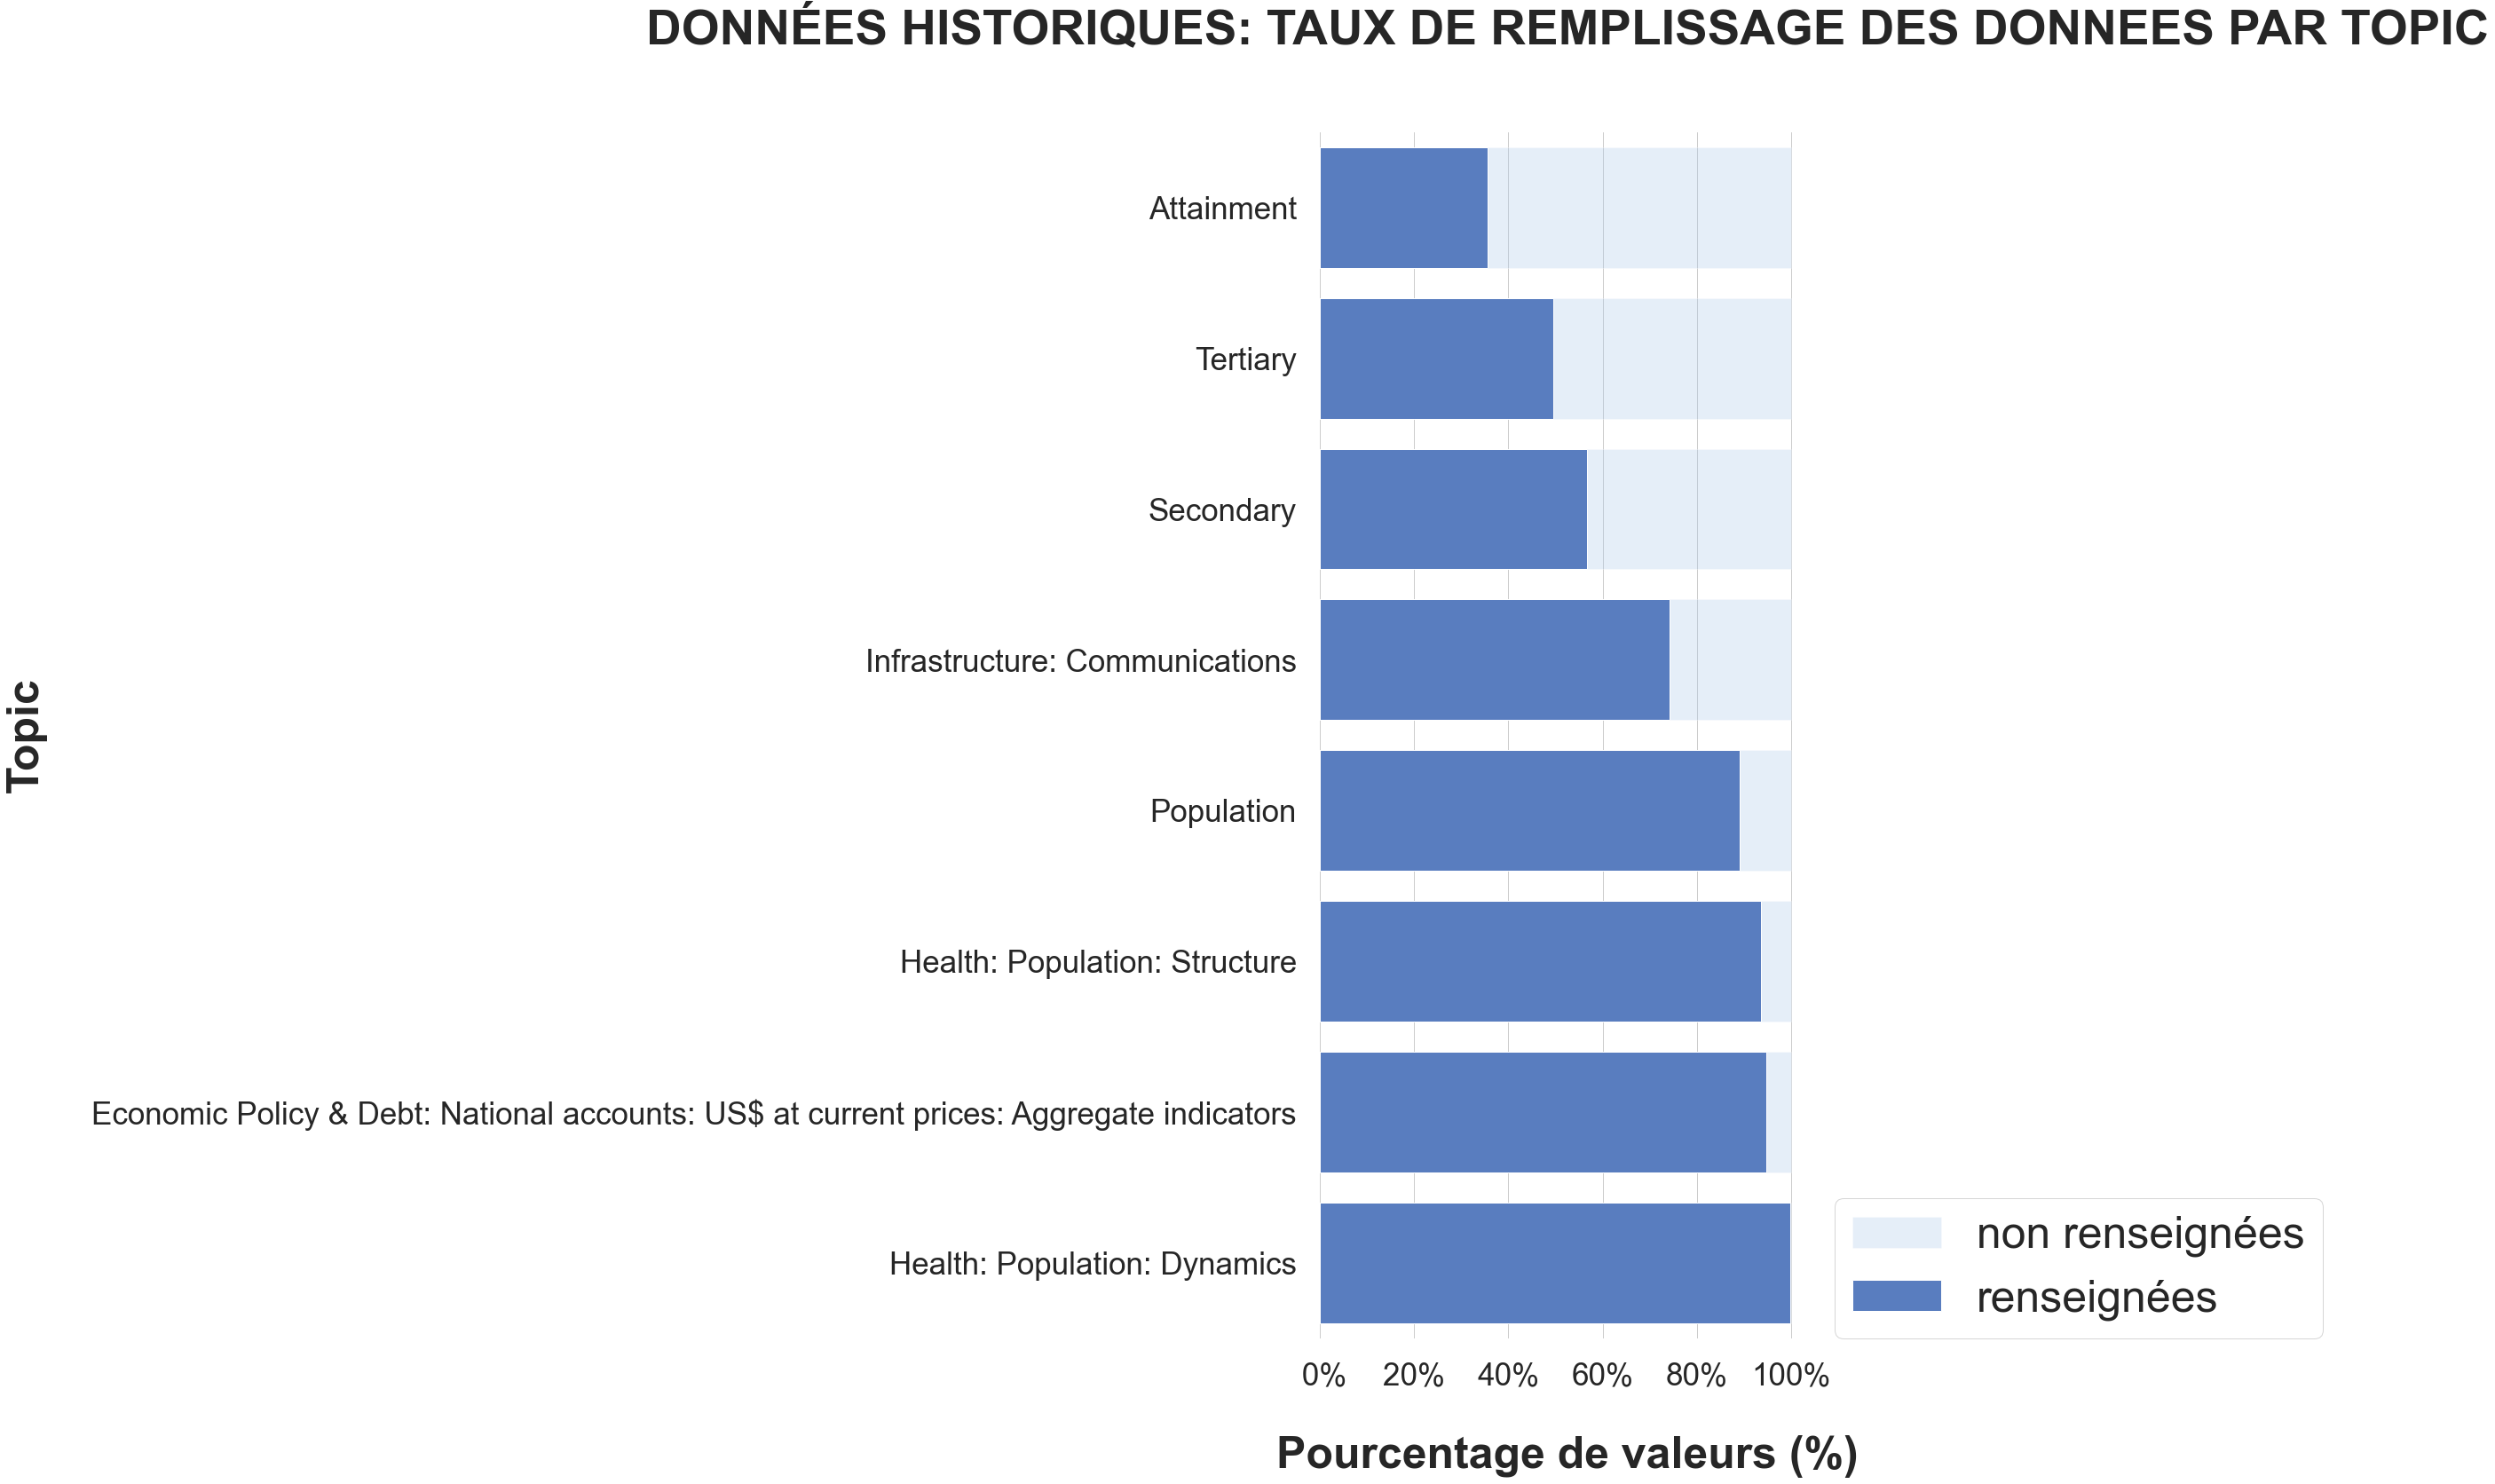

In [47]:
pf.plotTauxRemplissage(historical_data, "Topic", 10, 25,"Données Historiques")

C:\Users\RaissaTomeba\Formation\project_functions.py:130: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(b.get_xticks(), size = Y_SIZE)
C:\Users\RaissaTomeba\Formation\project_functions.py:140: UserWarning: FixedFormatter should only be used together with FixedLocator
  c.set_xticklabels(c.get_xticks(), size = Y_SIZE)


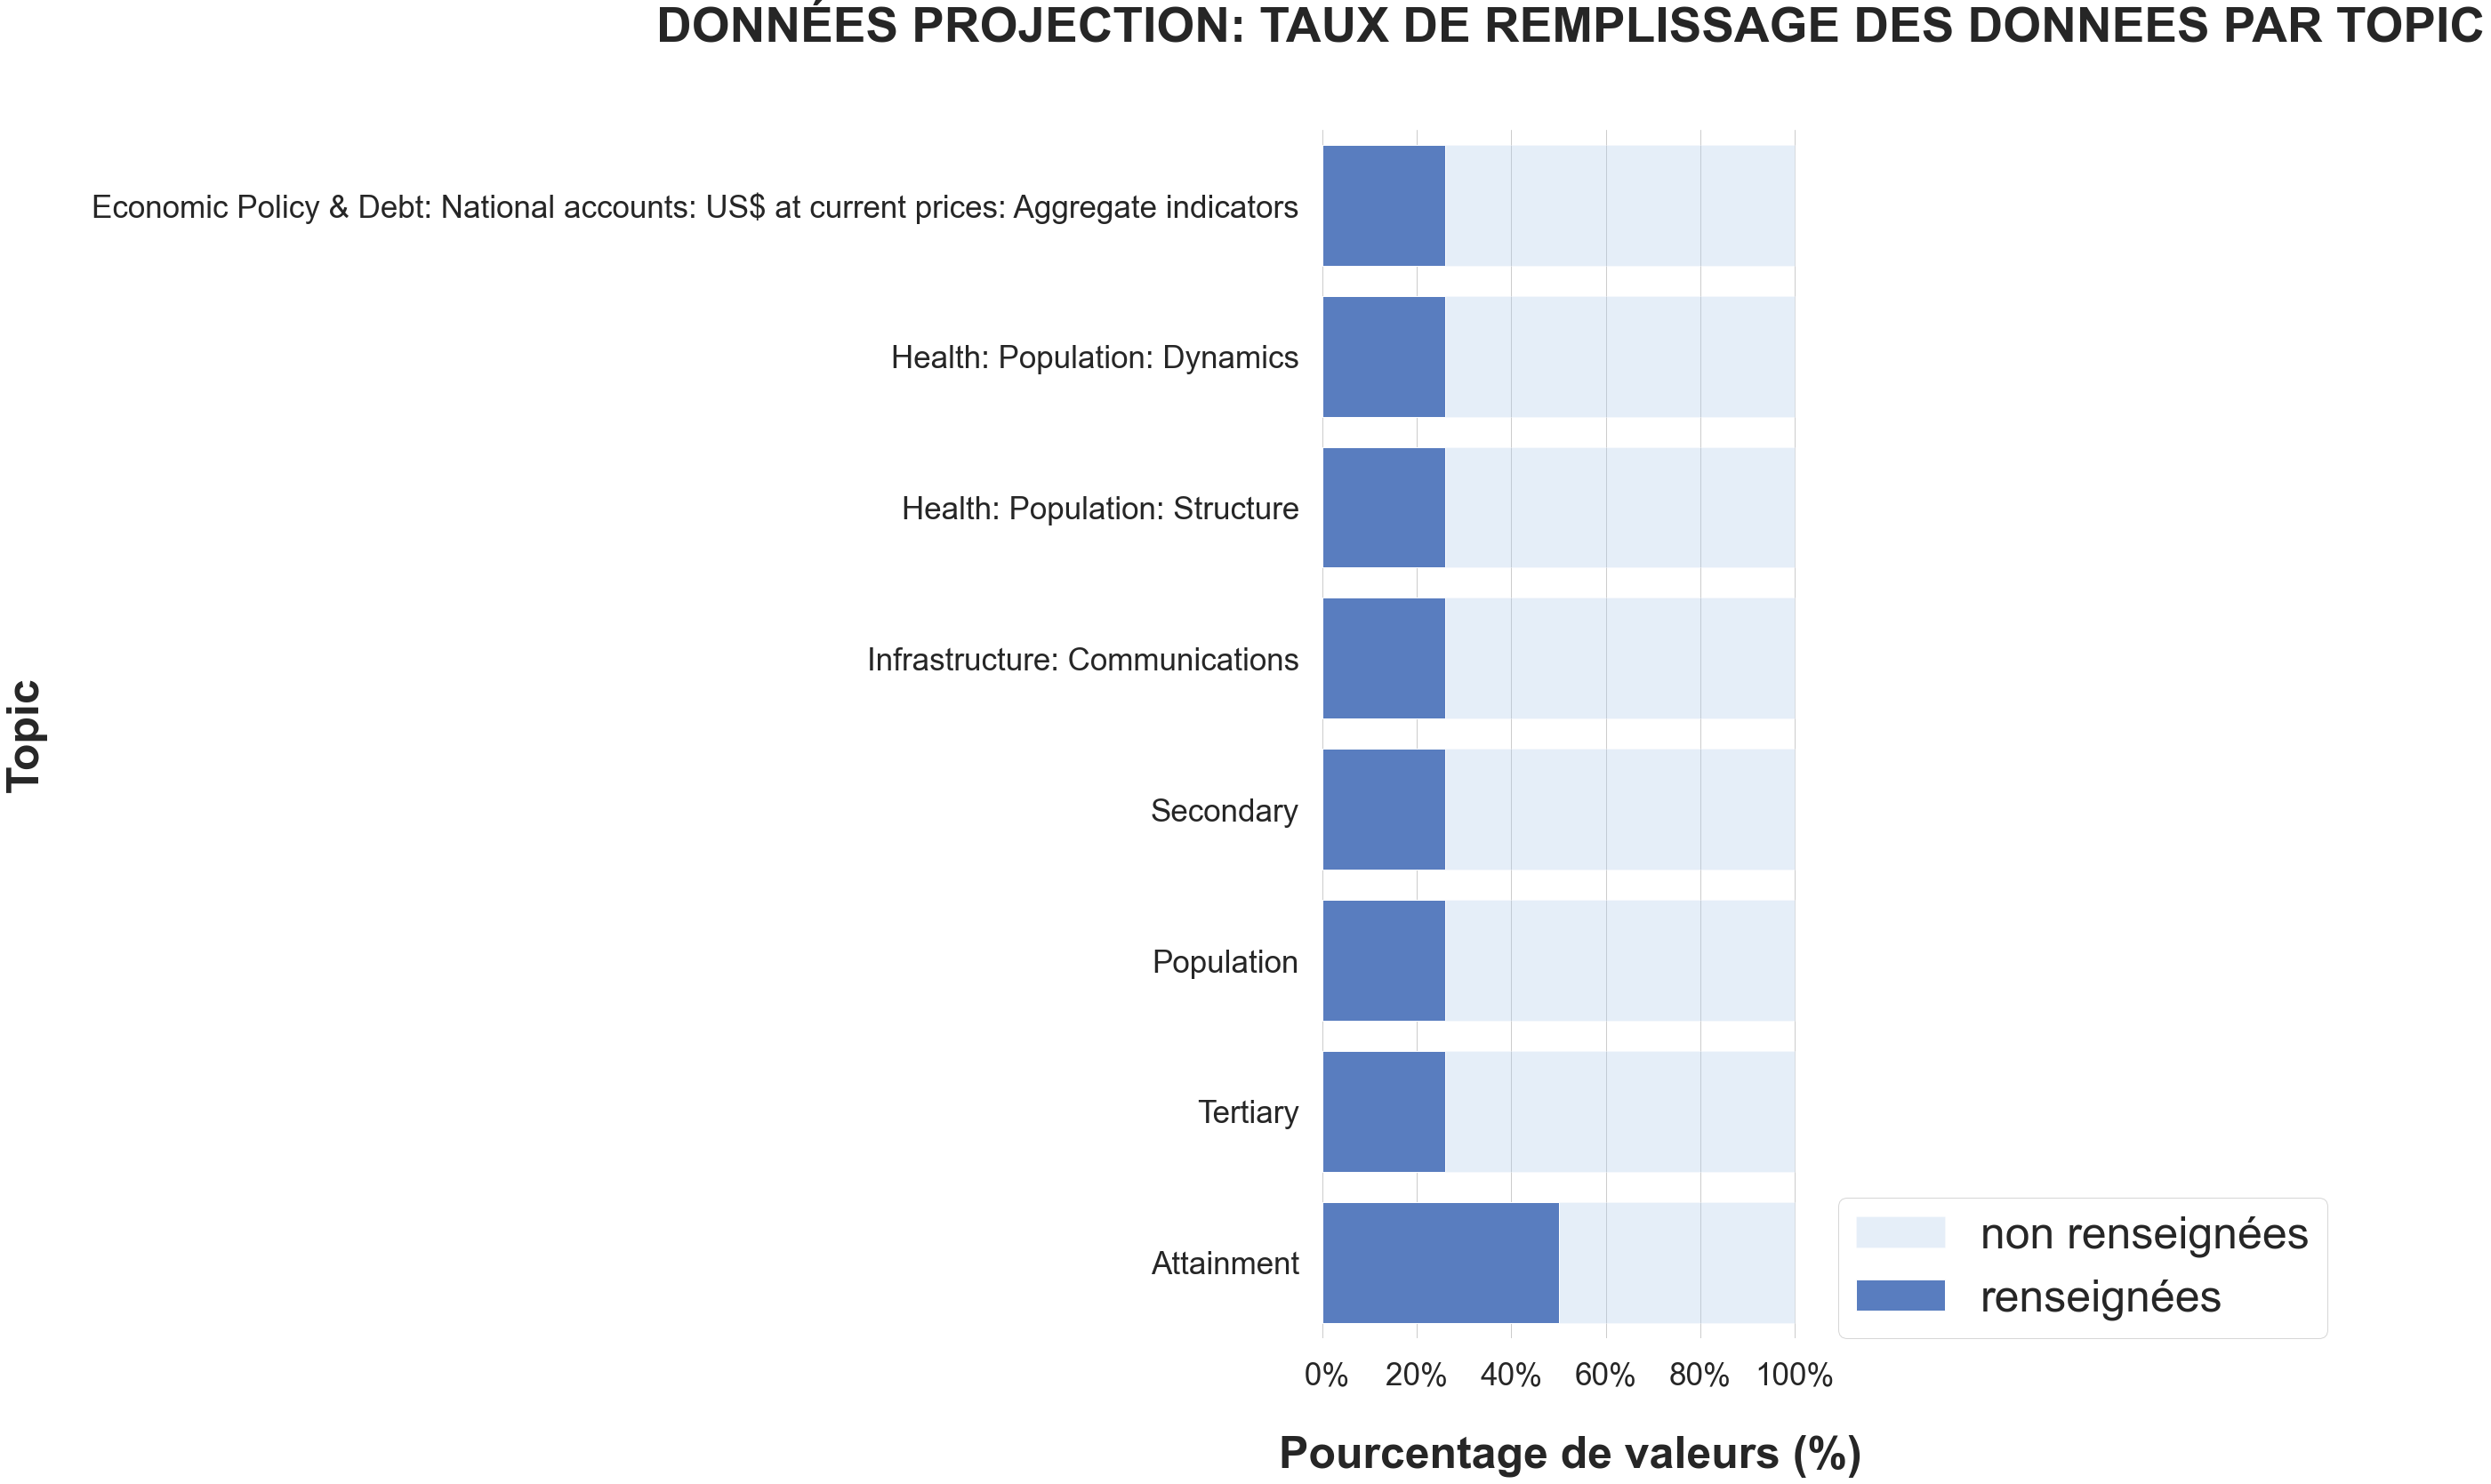

In [48]:
pf.plotTauxRemplissage(projection_data, "Topic", 10, 25, "Données Projection")

___
### 3.3 Taux de remplissage de données par pays

C:\Users\RaissaTomeba\Formation\project_functions.py:130: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(b.get_xticks(), size = Y_SIZE)
C:\Users\RaissaTomeba\Formation\project_functions.py:140: UserWarning: FixedFormatter should only be used together with FixedLocator
  c.set_xticklabels(c.get_xticks(), size = Y_SIZE)


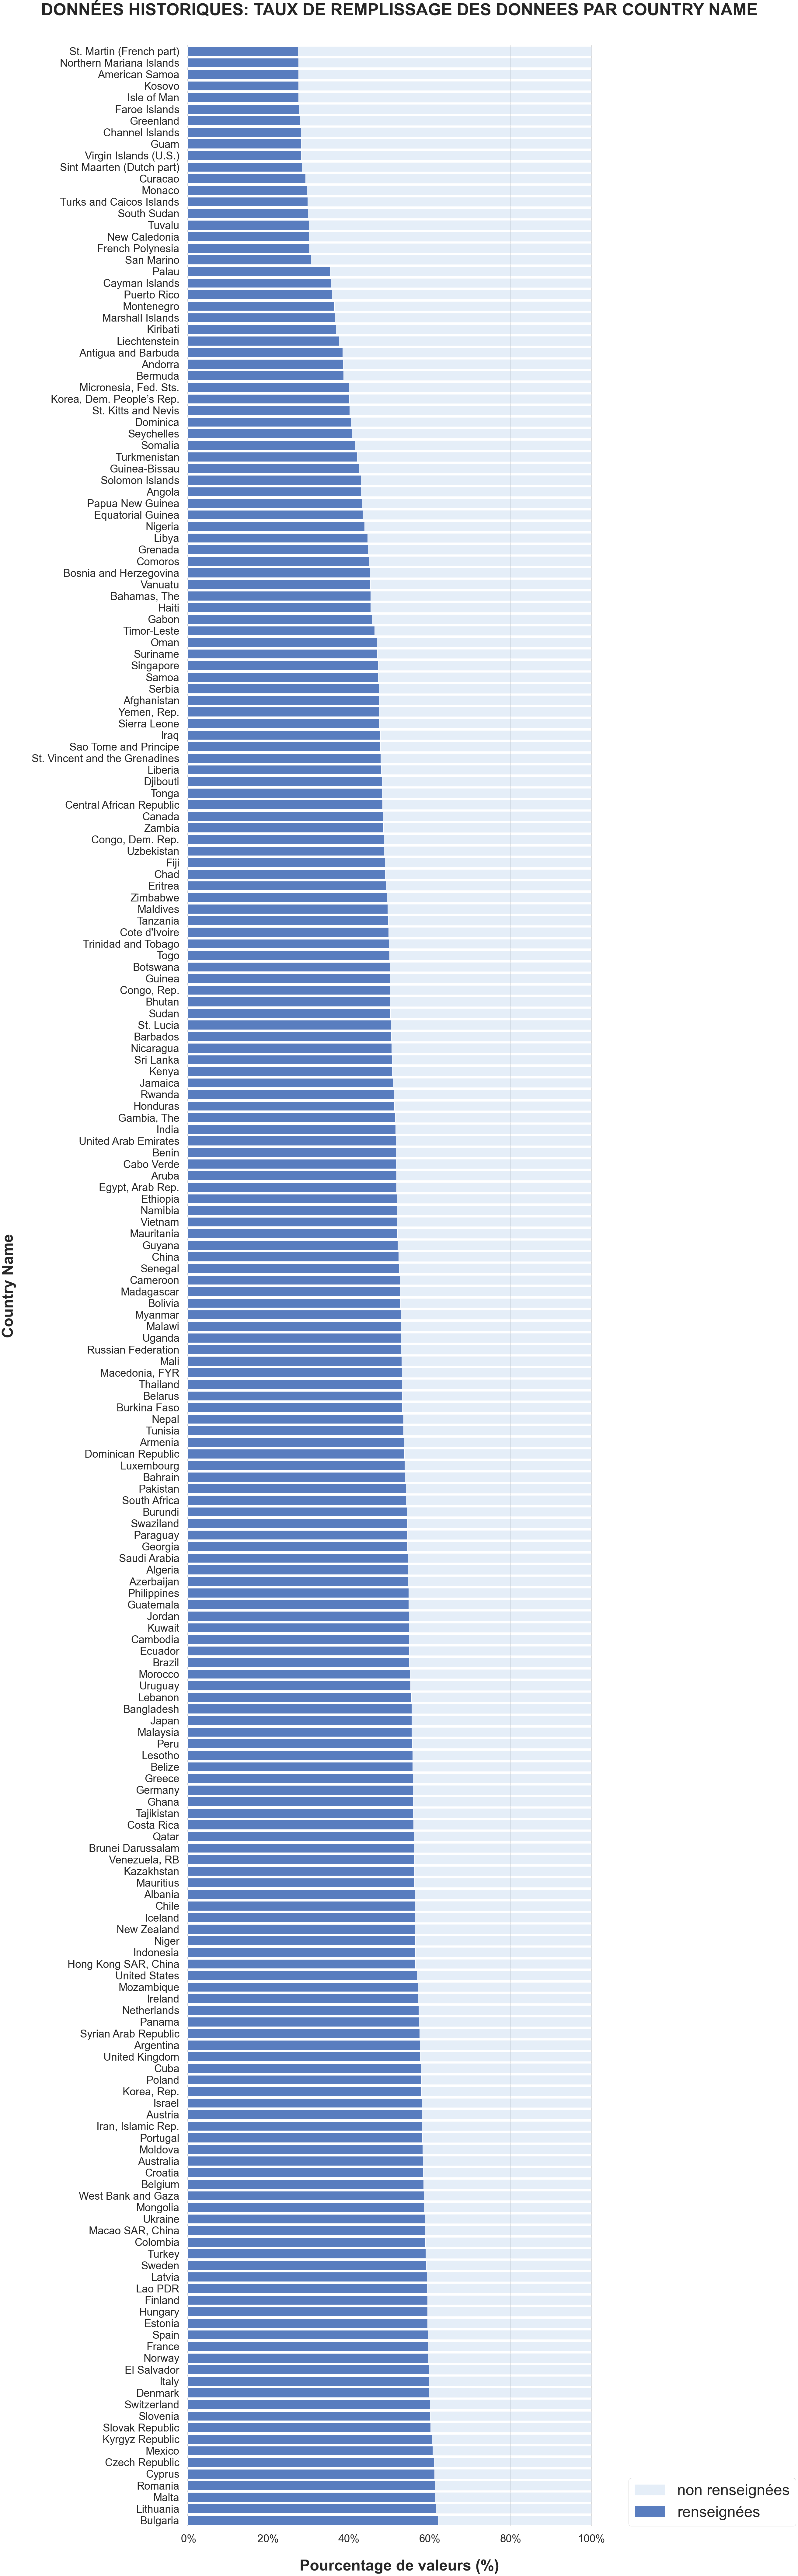

In [49]:
pf.plotTauxRemplissage(historical_data, "Country Name", 25, 150,"Données Historiques")

C:\Users\RaissaTomeba\Formation\project_functions.py:130: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(b.get_xticks(), size = Y_SIZE)
C:\Users\RaissaTomeba\Formation\project_functions.py:140: UserWarning: FixedFormatter should only be used together with FixedLocator
  c.set_xticklabels(c.get_xticks(), size = Y_SIZE)


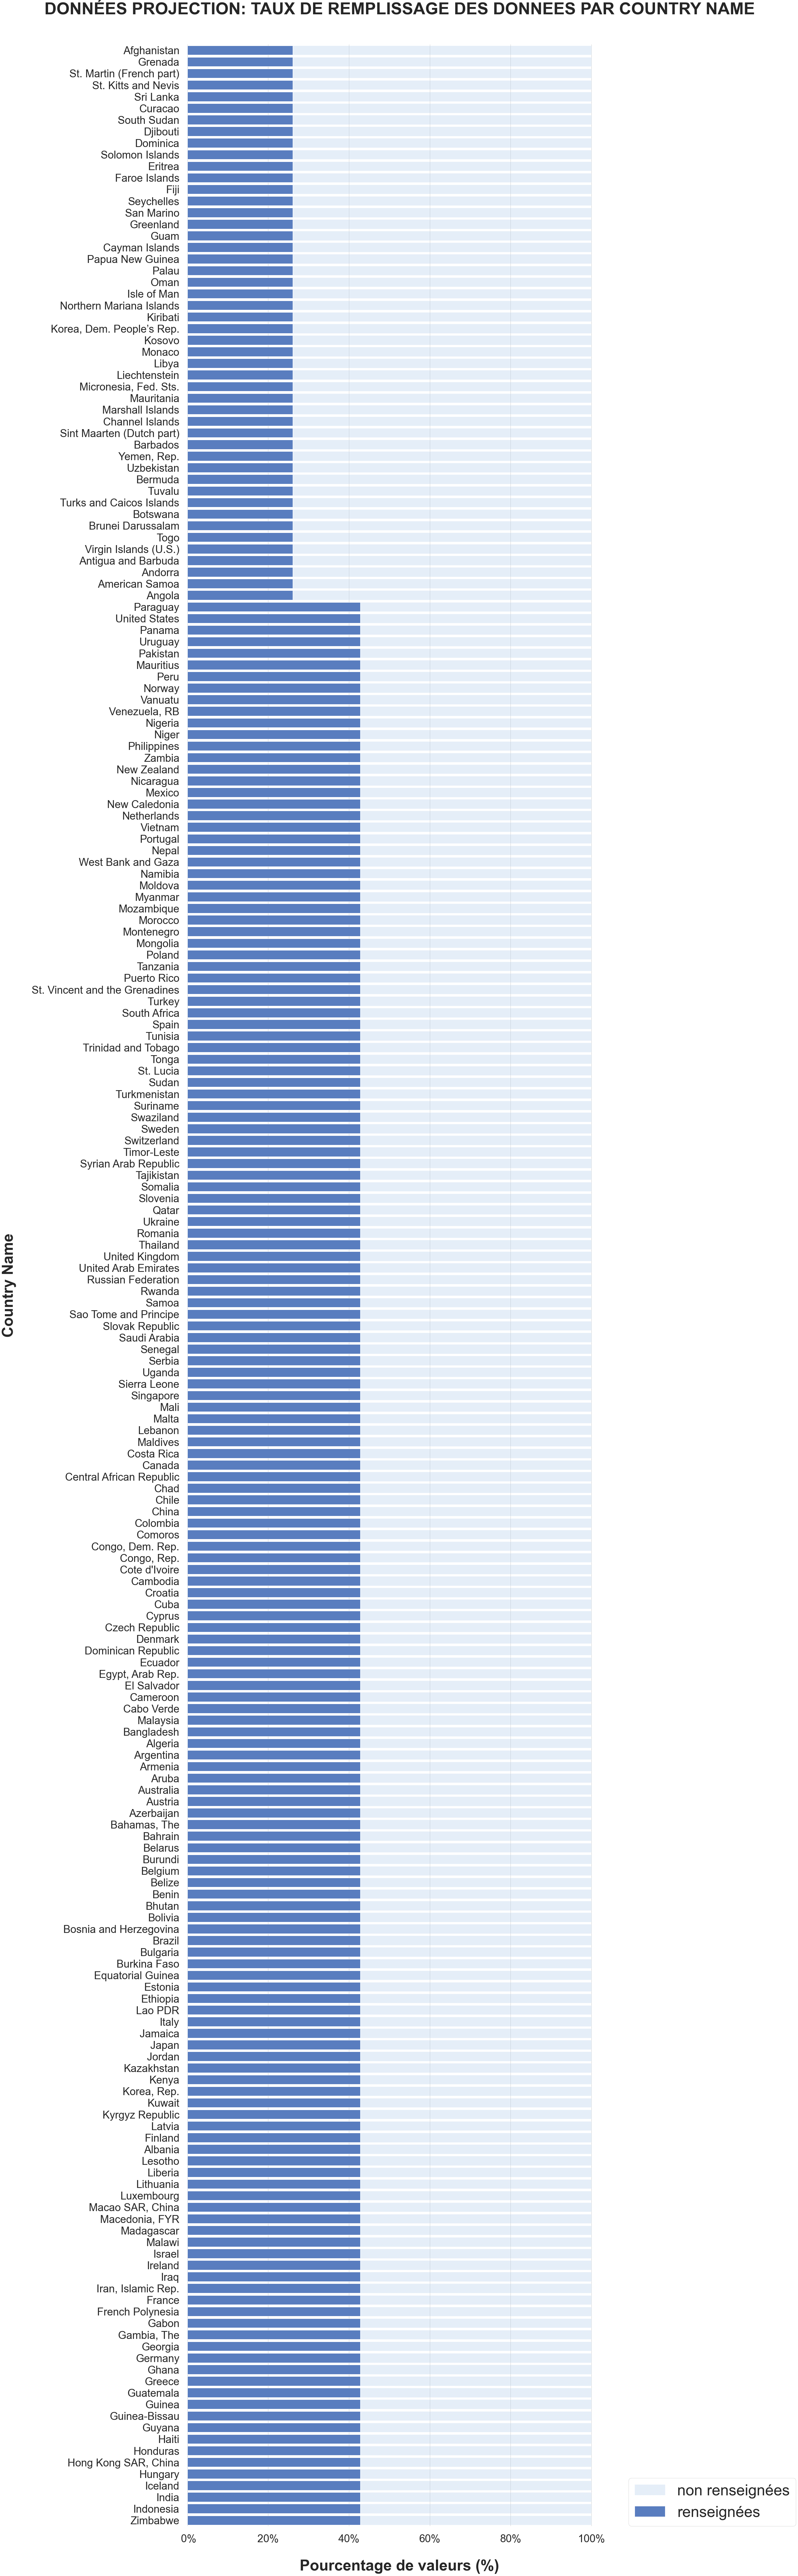

In [50]:
pf.plotTauxRemplissage(projection_data, "Country Name", 25, 150,"Données Projection")

### Pourcentages globaux de remplissage des données 

In [51]:
#Pourcentage de remplissage des données
print("Pourcentage de remplissage des données historiques :",
      (1-historical_data.loc[:,'2000':'2015'].isna().mean().mean())*100)
print("Pourcentage de remplissage des données de projection:",
      (1-projection_data.loc[:,'2020':'2100'].isna().mean().mean())*100)

Pourcentage de remplissage des données historiques : 31.37040607167627
Pourcentage de remplissage des données de projection: 17.554437020607438


___
### Conclusion

- le jeu de données est relativement peu rempli dans l'ensemble.
- Pourcentage de remplissage des données historiques : 31.37 %
- Pourcentage de remplissage des données de projection: 17.55 %
- Aucune zone géographique ne se démarque en termes de complétude des données. 
- Toutefois, un certain nombre de topics relativement bien renseignés sont présents, qui devraient permettre de répondre aux problématiques.


___
# 4. SELECTION DEFINITIVE DES INDICATEURS ET PAYS 

Nous allons maintenant affiner notre sélection de données pertinentes en fonction du besoin métier en:
- Examinant la signification et le taux de remplissage des 1393 présélectionnés (pour ne retenir que les indicateurs les plus pertients pour chaque Topic pré-sélectionné)
- Supprimant les pays ayant moins de 30 % de taux de remplissage des données

___
## 4.1 Sélection définitive des pays pour l'étude

Suppression de tous les pays pour lesquels le taux de remplissage des données historiques est inférieur à 30 % 

In [52]:
#----------------------------------------------------------------------------------------
#Affiche les taux de remplissage (pourcentage valeurs renseignées/non renseignées) par pays 
#classés par ordre croissant du pourcentage valeurs renseignées (sur les données historiques)
#----------------------------------------------------------------------------------------

percent_missing_filled_df = pf.tauxRemplissageSelonCritere(historical_data, "Country Name")
percent_missing_filled_df = percent_missing_filled_df.sort_values(by=['Percent Filled'])
percent_missing_filled_df.head(30)

Percent Missing  Percent Filled  Total               Country Name
0        72.633759       27.366241    100   St. Martin (French part)
0        72.526885       27.473115    100   Northern Mariana Islands
0        72.506847       27.493153    100             American Samoa
0        72.480128       27.519872    100                     Kosovo
0        72.460090       27.539910    100                Isle of Man
0        72.416672       27.583328    100              Faroe Islands
0        72.172868       27.827132    100                  Greenland
0        71.899005       28.100995    100            Channel Islands
0        71.832209       28.167791    100                       Guam
0        71.795471       28.204529    100      Virgin Islands (U.S.)
0        71.688598       28.311402    100  Sint Maarten (Dutch part)
0        70.726738       29.273262    100                    Curacao
0        70.359361       29.640639    100                     Monaco
0        70.209071       29.790929    100   Turks and Caicos Islands
0        70.168993       29.831007    100                South Sudan
0        69.905150       30.094850    100                     Tuvalu
0        69.841694       30.158306    100              New Caledonia
0        69.788257       30.211743    100           French Polynesia
0        69.407521       30.592479    100                 San Marino
0        64.658339       35.341661    100                      Palau
0        64.544787       35.455213    100             Cayman Islands
0        64.187429       35.812571    100                Puerto Rico
0        63.609645       36.390355    100                 Montenegro
0        63.442656       36.557344    100           Marshall Islands
0        63.218890       36.781110    100                   Kiribati
0        62.457418       37.542582    100              Liechtenstein
0        61.552335       38.447665    100        Antigua and Barbuda
0        61.428762       38.571238    100                    Andorra
0        61.328569       38.671431    100                    Bermuda
0        59.972614       40.027386    100      Micronesia, Fed. Sts.

In [53]:
#Récupération de la liste des pays à supprimer 
rslt_df = percent_missing_filled_df.loc[percent_missing_filled_df['Percent Filled'] < 30]
country_to_delete = rslt_df['Country Name'] 
country_to_delete

0     St. Martin (French part)
0     Northern Mariana Islands
0               American Samoa
0                       Kosovo
0                  Isle of Man
0                Faroe Islands
0                    Greenland
0              Channel Islands
0                         Guam
0        Virgin Islands (U.S.)
0    Sint Maarten (Dutch part)
0                      Curacao
0                       Monaco
0     Turks and Caicos Islands
0                  South Sudan
Name: Country Name, dtype: object

In [54]:
#-------------------------------------------------------------
# Restriction des données aux pays n'appartenant pas à country_to_delete
#-------------------------------------------------------------

historical_data_df = historical_data[~historical_data['Country Name'].isin(country_to_delete)]
projection_data_df = projection_data[~projection_data['Country Name'].isin(country_to_delete)]

___
## 4.2 Sélection définitive des indicateurs pour l'étude

Nous explorons les indicateurs associées aux Topics pré-sélectionnnés en inspectant leur:
- signification
- taux de remplissage (l'évaluation du taux de remplissage sera essentiellement faite dur les données historiques. Sauf pour le topic "Attaintment" qui semble être un indicateur de projection) 

Ceci devrait nous aider à affiner notre sélection pour se restreindre uniquement aux indicateurs les plus pertinents pour répondre à la problématique du métier.

___
### 4.2.1 Topic: Attainment

In [55]:
topic = 'Attainment'

In [56]:
print("Taux de remplissage pour les données de projection")
indicators_df = pf.tauxRemplissageIndicateurs(projection_data_df, topic)
indicators_df

Taux de remplissage pour les données de projection


Code  \
733      PRJ.POP.ALL.3.MF   
529     PRJ.ATT.2039.4.MF   
522     PRJ.ATT.2039.2.MA   
523     PRJ.ATT.2039.2.MF   
524   PRJ.ATT.2039.NED.FE   
..                    ...   
247      BAR.NOED.25UP.ZS   
248  BAR.PRM.CMPT.25UP.ZS   
249  BAR.PRM.ICMP.25UP.ZS   
250  BAR.SEC.CMPT.25UP.ZS   
367    UIS.EA.7.AG25T99.F   

                                                                                                                            Description  \
733                 Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total   
529   Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Post Secondary. Total   
522   Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Lower Secondary. Male   
523  Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Lower Secondary. Total   
524    Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. No Education. Female   
..                                                                                                                                  ...   
247                                                                       Barro-Lee: Percentage of population age 25+ with no education   
248                                               Barro-Lee: Percentage of population age 25+ with primary schooling. Completed Primary   
249                        Barro-Lee: Percentage of population age 25+ with primary schooling. Total (Incomplete and Completed Primary)   
250                                           Barro-Lee: Percentage of population age 25+ with secondary schooling. Completed Secondary   
367                              UIS: Percentage of population age 25+ with a completed master's or equivalent degree (ISCED 7). Female   

     Taux remplissage  
733         87.743063  
529         87.743063  
522         87.743063  
523         87.743063  
524         87.743063  
..                ...  
247         26.086957  
248         26.086957  
249         26.086957  
250         26.086957  
367         26.086957  

[733 rows x 3 columns]

**Recherche des indicateurs contenant les mots clés "Tertiary" et "Secondary"**

In [57]:
indicators_check_df = indicators_df[indicators_df['Description'].str.contains("Tertiary")]
indicators_check_df.shape

(60, 3)

In [58]:
indicators_check_df.head(10)

Code  \
126  BAR.TER.CMPT.15UP.FE.ZS   
127  BAR.TER.ICMP.15UP.FE.ZS   
133  BAR.TER.CMPT.1519.FE.ZS   
134  BAR.TER.ICMP.1519.FE.ZS   
162  BAR.TER.ICMP.3034.FE.ZS   
168  BAR.TER.CMPT.3539.FE.ZS   
169  BAR.TER.ICMP.3539.FE.ZS   
175  BAR.TER.CMPT.4044.FE.ZS   
176  BAR.TER.ICMP.4044.FE.ZS   
182  BAR.TER.CMPT.4549.FE.ZS   

                                                                                                                 Description  \
126                           Barro-Lee: Percentage of female population age 15+ with tertiary schooling. Completed Tertiary   
127    Barro-Lee: Percentage of female population age 15+ with tertiary schooling. Total (Incomplete and Completed Tertiary)   
133                         Barro-Lee: Percentage of female population age 15-19 with tertiary schooling. Completed Tertiary   
134  Barro-Lee: Percentage of female population age 15-19 with tertiary schooling. Total (Incomplete and Completed Tertiary)   
162  Barro-Lee: Percentage of female population age 30-34 with tertiary schooling. Total (Incomplete and Completed Tertiary)   
168                         Barro-Lee: Percentage of female population age 35-39 with tertiary schooling. Completed Tertiary   
169  Barro-Lee: Percentage of female population age 35-39 with tertiary schooling. Total (Incomplete and Completed Tertiary)   
175                         Barro-Lee: Percentage of female population age 40-44 with tertiary schooling. Completed Tertiary   
176  Barro-Lee: Percentage of female population age 40-44 with tertiary schooling. Total (Incomplete and Completed Tertiary)   
182                         Barro-Lee: Percentage of female population age 45-49 with tertiary schooling. Completed Tertiary   

     Taux remplissage  
126         26.086957  
127         26.086957  
133         26.086957  
134         26.086957  
162         26.086957  
168         26.086957  
169         26.086957  
175         26.086957  
176         26.086957  
182         26.086957

In [59]:
indicators_check_df = indicators_df[indicators_df['Description'].str.contains("Secondary")]
indicators_check_df.shape

(195, 3)

In [60]:
indicators_check_df.head(20)

Code  \
733   PRJ.POP.ALL.3.MF   
529  PRJ.ATT.2039.4.MF   
522  PRJ.ATT.2039.2.MA   
523  PRJ.ATT.2039.2.MF   
527  PRJ.ATT.2039.4.FE   
528  PRJ.ATT.2039.4.MA   
539  PRJ.ATT.2064.2.FE   
533  PRJ.ATT.2039.3.FE   
534  PRJ.ATT.2039.3.MA   
535  PRJ.ATT.2039.3.MF   
521  PRJ.ATT.2039.2.FE   
503  PRJ.ATT.2024.2.FE   
504  PRJ.ATT.2024.2.MA   
505  PRJ.ATT.2024.2.MF   
509  PRJ.ATT.2024.4.FE   
510  PRJ.ATT.2024.4.MA   
511  PRJ.ATT.2024.4.MF   
515  PRJ.ATT.2024.3.FE   
516  PRJ.ATT.2024.3.MA   
517  PRJ.ATT.2024.3.MF   

                                                                                                                             Description  \
733                  Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total   
529    Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Post Secondary. Total   
522    Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Lower Secondary. Male   
523   Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Lower Secondary. Total   
527   Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Post Secondary. Female   
528     Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Post Secondary. Male   
539  Wittgenstein Projection: Percentage of the population age 20-64 by highest level of educational attainment. Lower Secondary. Female   
533  Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Upper Secondary. Female   
534    Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Upper Secondary. Male   
535   Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Upper Secondary. Total   
521  Wittgenstein Projection: Percentage of the population age 20-39 by highest level of educational attainment. Lower Secondary. Female   
503  Wittgenstein Projection: Percentage of the population age 20-24 by highest level of educational attainment. Lower Secondary. Female   
504    Wittgenstein Projection: Percentage of the population age 20-24 by highest level of educational attainment. Lower Secondary. Male   
505   Wittgenstein Projection: Percentage of the population age 20-24 by highest level of educational attainment. Lower Secondary. Total   
509   Wittgenstein Projection: Percentage of the population age 20-24 by highest level of educational attainment. Post Secondary. Female   
510     Wittgenstein Projection: Percentage of the population age 20-24 by highest level of educational attainment. Post Secondary. Male   
511    Wittgenstein Projection: Percentage of the population age 20-24 by highest level of educational attainment. Post Secondary. Total   
515  Wittgenstein Projection: Percentage of the population age 20-24 by highest level of educational attainment. Upper Secondary. Female   
516    Wittgenstein Projection: Percentage of the population age 20-24 by highest level of educational attainment. Upper Secondary. Male   
517   Wittgenstein Projection: Percentage of the population age 20-24 by highest level of educational attainment. Upper Secondary. Total   

     Taux remplissage  
733         87.743063  
529         87.743063  
522         87.743063  
523         87.743063  
527         87.743063  
528         87.743063  
539         87.743063  
533         87.743063  
534         87.743063  
535         87.743063  
521         87.743063  
503         87.743063  
504         87.743063  
505         87.743063  
509         87.743063  
510         87.743063  
511         87.743063  
515         87.743063  
516         87.743063  
517         87.743063

**Indicateurs pertinents**
- **PRJ.ATT.15UP.2.MF**: Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Lower Secondary. Total
- **PRJ.ATT.15UP.3.MF**: Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Upper Secondary. Total	
- **PRJ.ATT.15UP.4.MF**: Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Post Secondary. Total

Aucun indicateur de projection pertinent trouvé pour Tertiary

___
### 4.2.2 Topic: Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators

In [61]:
topic = 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators'

In [62]:
print("Taux de remplissage pour les données historiques")
pf.tauxRemplissageIndicateurs(historical_data_df, topic)

Taux de remplissage pour les données historiques


Code                         Description  Taux remplissage
1  NY.GDP.MKTP.CD  GDP at market prices (current US$)         97.578803
2  NY.GDP.PCAP.CD        GDP per capita (current US$)         97.578803
3  NY.GNP.MKTP.CD                   GNI (current US$)         95.911375

**Indicateur pertinent**
- **NY.GDP.PCAP.CD**: GDP per capita (current US$) 

___
### 4.2.3 Topic: Health: Population: Dynamics

In [63]:
topic= 'Health: Population: Dynamics'

In [64]:
print("Taux de remplissage pour les données historiques")
pf.tauxRemplissageIndicateurs(historical_data_df, topic)

Taux de remplissage pour les données historiques


Code                   Description  Taux remplissage
1  SP.POP.GROW  Population growth (annual %)         99.885793

**1 seul indicateur d'office sélectionné**
- **SP.POP.GROW**: Population growth (annual %)

___
### 4.2.4 Topic: Health: Population: Structure

In [65]:
topic= 'Health: Population: Structure'

In [66]:
print("Taux de remplissage pour les données historiques")
pf.tauxRemplissageIndicateurs(historical_data_df, topic)

Taux de remplissage pour les données historiques


Code                          Description  Taux remplissage
13        SP.POP.TOTL                    Population, total         99.908634
1   SP.POP.0014.TO.ZS   Population, ages 0-14 (% of total)         96.253997
2   SP.POP.0014.FE.IN        Population, ages 0-14, female         96.253997
3   SP.POP.0014.MA.IN          Population, ages 0-14, male         96.253997
4      SP.POP.0014.TO         Population, ages 0-14, total         96.253997
5   SP.POP.1564.TO.ZS  Population, ages 15-64 (% of total)         96.253997
6   SP.POP.1564.FE.IN       Population, ages 15-64, female         96.253997
7   SP.POP.1564.MA.IN         Population, ages 15-64, male         96.253997
8      SP.POP.1564.TO        Population, ages 15-64, total         96.253997
9   SP.POP.TOTL.FE.IN                   Population, female         96.253997
10  SP.POP.TOTL.FE.ZS      Population, female (% of total)         96.253997
11  SP.POP.TOTL.MA.IN                     Population, male         96.253997
12  SP.POP.TOTL.MA.ZS        Population, male (% of total)         96.253997

**Indicateurs pertinents**
- **SP.POP.TOTL**: Population, total
- **SP.POP.1564.TO.ZS**: Population, ages 15-64 (% of total)	

___
### 4.2.5 Infrastructure: Communications

In [67]:
topic= 'Infrastructure: Communications'

In [68]:
print("Taux de remplissage pour les données historiques")
pf.tauxRemplissageIndicateurs(historical_data_df, topic)

Taux de remplissage pour les données historiques


Code                          Description  Taux remplissage
1  IT.NET.USER.P2      Internet users (per 100 people)         98.149840
2  IT.CMP.PCMP.P2  Personal computers (per 100 people)         55.276382

**Indicateur pertinent**
- **IT.NET.USER.P2**: Internet users (per 100 people)

___
### 4.2.6 Topic: Population

In [69]:
topic= 'Population'

In [70]:
print("Taux de remplissage pour les données historiques")
indicators_df = pf.tauxRemplissageIndicateurs(historical_data_df, topic)
indicators_df

Taux de remplissage pour les données historiques


Code  \
25     SP.SEC.UTOT.IN   
26  SP.SEC.UTOT.FE.IN   
27  SP.SEC.UTOT.MA.IN   
4      SP.SEC.LTOT.IN   
5   SP.SEC.LTOT.FE.IN   
..                ...   
2        UIS.SAP.CE.F   
3        UIS.SAP.CE.M   
7           UIS.SAP.4   
9         UIS.SAP.4.M   
8         UIS.SAP.4.F   

                                                                                      Description  \
25              Population of the official age for upper secondary education, both sexes (number)   
26                  Population of the official age for upper secondary education, female (number)   
27                    Population of the official age for upper secondary education, male (number)   
4               Population of the official age for lower secondary education, both sexes (number)   
5                   Population of the official age for lower secondary education, female (number)   
..                                                                                            ...   
2                                            Population of compulsory school age, female (number)   
3                                              Population of compulsory school age, male (number)   
7   Population of the official age for post-secondary non-tertiary education, both sexes (number)   
9         Population of the official age for post-secondary non-tertiary education, male (number)   
8       Population of the official age for post-secondary non-tertiary education, female (number)   

    Taux remplissage  
25         97.304705  
26         97.304705  
27         97.304705  
4          97.259022  
5          97.259022  
..               ...  
2          79.990863  
3          79.990863  
7          75.148470  
9          74.783006  
8          74.783006  

[213 rows x 3 columns]

**Recherche des indicateurs contenant les mots clés "Tertiary" et "Secondary"**

In [71]:
indicators_check_df = indicators_df[indicators_df['Description'].str.contains("tertiary")]
indicators_check_df.shape

(6, 3)

In [72]:
indicators_check_df

Code  \
19     SP.TER.TOTL.IN   
21  SP.TER.TOTL.MA.IN   
20  SP.TER.TOTL.FE.IN   
7           UIS.SAP.4   
9         UIS.SAP.4.M   
8         UIS.SAP.4.F   

                                                                                      Description  \
19                     Population of the official age for tertiary education, both sexes (number)   
21                           Population of the official age for tertiary education, male (number)   
20                         Population of the official age for tertiary education, female (number)   
7   Population of the official age for post-secondary non-tertiary education, both sexes (number)   
9         Population of the official age for post-secondary non-tertiary education, male (number)   
8       Population of the official age for post-secondary non-tertiary education, female (number)   

    Taux remplissage  
19         93.741434  
21         93.741434  
20         93.741434  
7          75.148470  
9          74.783006  
8          74.783006

In [73]:
indicators_check_df = indicators_df[indicators_df['Description'].str.contains("secondary")]
indicators_check_df.shape

(15, 3)

In [74]:
indicators_check_df

Code  \
25       SP.SEC.UTOT.IN   
26    SP.SEC.UTOT.FE.IN   
27    SP.SEC.UTOT.MA.IN   
4        SP.SEC.LTOT.IN   
5     SP.SEC.LTOT.FE.IN   
6     SP.SEC.LTOT.MA.IN   
18    SP.SEC.TOTL.MA.IN   
17    SP.SEC.TOTL.FE.IN   
16       SP.SEC.TOTL.IN   
31    UIS.SAP.23.GPV.G1   
32  UIS.SAP.23.GPV.G1.F   
33  UIS.SAP.23.GPV.G1.M   
7             UIS.SAP.4   
9           UIS.SAP.4.M   
8           UIS.SAP.4.F   

                                                                                      Description  \
25              Population of the official age for upper secondary education, both sexes (number)   
26                  Population of the official age for upper secondary education, female (number)   
27                    Population of the official age for upper secondary education, male (number)   
4               Population of the official age for lower secondary education, both sexes (number)   
5                   Population of the official age for lower secondary education, female (number)   
6                     Population of the official age for lower secondary education, male (number)   
18                          Population of the official age for secondary education, male (number)   
17                        Population of the official age for secondary education, female (number)   
16                    Population of the official age for secondary education, both sexes (number)   
31    Population of the official entrance age to secondary general education, both sexes (number)   
32        Population of the official entrance age to secondary general education, female (number)   
33          Population of the official entrance age to secondary general education, male (number)   
7   Population of the official age for post-secondary non-tertiary education, both sexes (number)   
9         Population of the official age for post-secondary non-tertiary education, male (number)   
8       Population of the official age for post-secondary non-tertiary education, female (number)   

    Taux remplissage  
25         97.304705  
26         97.304705  
27         97.304705  
4          97.259022  
5          97.259022  
6          97.259022  
18         97.190498  
17         97.190498  
16         97.190498  
31         96.550937  
32         96.185473  
33         96.185473  
7          75.148470  
9          74.783006  
8          74.783006

**Indicateurs pertinents**
- **SP.SEC.TOTL.IN**: Population of the official age for secondary education, both sexes (number)
- **SP.TER.TOTL.IN**: Population of the official age for tertiary education, both sexes (number)	

___
### 4.2.7 Topic: Secondary

In [75]:
topic = 'Secondary'

In [76]:
print("Taux de remplissage pour les données historiques")
indicators_df = pf.tauxRemplissageIndicateurs(historical_data_df, topic)
indicators_df.head()

Taux de remplissage pour les données historiques


Code  \
122        SE.SEC.AGES   
241     SE.SEC.DURS.UP   
240        SE.SEC.DURS   
68      SE.SEC.ENRL.GC   
69   SE.SEC.ENRL.GC.FE   

                                                    Description  \
122  Official entrance age to lower secondary education (years)   
241   Theoretical duration of upper secondary education (years)   
240         Theoretical duration of secondary education (years)   
68          Enrolment in secondary general, both sexes (number)   
69              Enrolment in secondary general, female (number)   

     Taux remplissage  
122         99.223390  
241         99.223390  
240         99.223390  
68          84.787574  
69          84.216537

**Indicateurs pertinents**
- **SE.SEC.ENRL**: Enrolment in secondary education, both sexes (number)
- **SE.SEC.ENRR**: Gross enrolment ratio, secondary, both sexes (%)		

___
### 4.2.8 Topic: Social Protection & Labor: Labor force structure

In [77]:
topic='Social Protection & Labor: Labor force structure' 

In [78]:
print("Taux de remplissage pour les données historiques")
pf.tauxRemplissageIndicateurs(historical_data_df, topic)

Taux de remplissage pour les données historiques


Empty DataFrame
Columns: [Code, Description, Taux remplissage]
Index: []

**Indicateur pertinent**
- **SL.TLF.TOTL.IN**: Labor force, total	

___
### 4.2.9 Topic: Social Protection & Labor: Unemployment

In [79]:
topic='Social Protection & Labor: Unemployment'

In [80]:
print("Taux de remplissage pour les données historiques")
pf.tauxRemplissageIndicateurs(historical_data_df, topic)

Taux de remplissage pour les données historiques


Empty DataFrame
Columns: [Code, Description, Taux remplissage]
Index: []

**Indicateur pertinent**
- **SL.UEM.TOTL.ZS**: Unemployment, total (% of total labor force)	

___
### 4.2.10 Topic: Tertiary

In [81]:
topic='Tertiary'

In [82]:
print("Taux de remplissage pour les données historiques")
indicators_df = pf.tauxRemplissageIndicateurs(historical_data_df, topic)
indicators_df.head(20)

Taux de remplissage pour les données historiques


Code  \
35          UIS.GOER.56   
6           SE.TER.ENRL   
27          SE.TER.ENRR   
7        SE.TER.ENRL.FE   
135   SE.TER.ENRL.FE.ZS   
28       SE.TER.ENRR.FE   
29    SE.ENR.TERT.FM.ZS   
30       SE.TER.ENRR.MA   
3      UIS.TE_100000.56   
143          UIS.SLE.56   
4    UIS.TE_100000.56.F   
5    UIS.TE_100000.56.M   
145      UIS.SLE.56.GPI   
144        UIS.SLE.56.F   
146        UIS.SLE.56.M   
41           UIS.OMR.56   
140         SE.SCH.LIFE   
26          SE.TOT.ENRR   
142      SE.SCH.LIFE.MA   
141      SE.SCH.LIFE.FE   

                                                              Description  \
35            Gross outbound enrolment ratio, all regions, both sexes (%)   
6    Enrolment in tertiary education, all programmes, both sexes (number)   
27                        Gross enrolment ratio, tertiary, both sexes (%)   
7        Enrolment in tertiary education, all programmes, female (number)   
135       Percentage of students in tertiary education who are female (%)   
28                            Gross enrolment ratio, tertiary, female (%)   
29             Gross enrolment ratio, tertiary, gender parity index (GPI)   
30                              Gross enrolment ratio, tertiary, male (%)   
3     Enrolment in tertiary education per 100,000 inhabitants, both sexes   
143                  School life expectancy, tertiary, both sexes (years)   
4         Enrolment in tertiary education per 100,000 inhabitants, female   
5           Enrolment in tertiary education per 100,000 inhabitants, male   
145           School life expectancy, tertiary, gender parity index (GPI)   
144                      School life expectancy, tertiary, female (years)   
146                        School life expectancy, tertiary, male (years)   
41                   Outbound mobility ratio, all regions, both sexes (%)   
140       School life expectancy, primary to tertiary, both sexes (years)   
26             Gross enrolment ratio, primary to tertiary, both sexes (%)   
142             School life expectancy, primary to tertiary, male (years)   
141           School life expectancy, primary to tertiary, female (years)   

     Taux remplissage  
35          83.851074  
6           74.760164  
27          73.184102  
7           72.567382  
135         72.567382  
28          71.174052  
29          71.174052  
30          71.174052  
3           70.762905  
143         70.694381  
4           68.478757  
5           68.478757  
145         68.410233  
144         68.410233  
146         68.410233  
41          67.610781  
140         67.359525  
26          67.245317  
142         65.532206  
141         65.532206

**Indicateurs pertinents**
- **SE.TER.ENRL**: Enrolment in tertiary education, all programmes, both sexes (number)	
- **SE.TER.ENRR**: Gross enrolment ratio, tertiary, both sexes (%)		

### Récapitulatif de la liste définitive des indicateurs sélectionnés

#### 1. Attainment

- **PRJ.ATT.15UP.2.MF**: Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Lower Secondary. Total
- **PRJ.ATT.15UP.3.MF**: Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Upper Secondary. Total	
- **PRJ.ATT.15UP.4.MF**: Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Post Secondary. Total

#### 2. Economic Policy & Debt: National accounts: US at current prices: Aggregate indicators
- **NY.GDP.PCAP.CD**: GDP per capita (current US) 

#### 3. Health: Population: Dynamics
- **SP.POP.GROW**: Population growth (annual %)

#### 4. Health: Population: Structure
- **SP.POP.TOTL**: Population, total
- **SP.POP.1564.TO.ZS**: Population, ages 15-64 (% of total)

#### 5. Infrastructure: Communications
- **IT.NET.USER.P2**: Internet users (per 100 people)

#### 6. Population
- **SP.SEC.TOTL.IN**: Population of the official age for secondary education, both sexes (number)
- **SP.TER.TOTL.IN**: Population of the official age for tertiary education, both sexes (number)

#### 7. Secondary
- **SE.SEC.ENRL**: Enrolment in secondary education, both sexes (number)
- **SE.SEC.ENRR**: Gross enrolment ratio, secondary, both sexes (%)

#### 8. Tertiary
- **SE.TER.ENRL**: Enrolment in tertiary education, all programmes, both sexes (number)	
- **SE.TER.ENRR**: Gross enrolment ratio, tertiary, both sexes (%)		

In [83]:
# indicateurs descriptifs
final_inds_desc = [
    'NY.GDP.PCAP.CD',
    'SP.POP.GROW',
    'SP.POP.TOTL',
    'SP.POP.1564.TO.ZS',
    'IT.NET.USER.P2',
    'SP.SEC.TOTL.IN',
    'SP.TER.TOTL.IN',
    'SE.SEC.ENRL',
    'SE.SEC.ENRR',
    'SE.TER.ENRL',
    'SE.TER.ENRR'
]

# indicateurs de projection
final_inds_prj = [
    'PRJ.ATT.15UP.2.MF',
    'PRJ.ATT.15UP.3.MF',
    'PRJ.ATT.15UP.4.MF'
]

In [84]:
#-------------------------------------------------------------
# Restriction des données aux seuls indicateurs finaux
#-------------------------------------------------------------

final_historical_data_df = historical_data_df[historical_data_df['Indicator Code'].isin(final_inds_desc)]
final_projection_data_df = projection_data_df[projection_data_df['Indicator Code'].isin(final_inds_prj)]

total_data_df = pd.concat([final_historical_data_df, final_projection_data_df])

In [85]:
final_historical_data_df.shape

(2189, 22)

In [86]:
final_historical_data_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', 'Region',
       'Topic'],
      dtype='object')

In [87]:
final_projection_data_df.shape

(597, 23)

In [88]:
final_projection_data_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060',
       '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100',
       'Region', 'Topic'],
      dtype='object')

### Répartition des indicateurs finaux

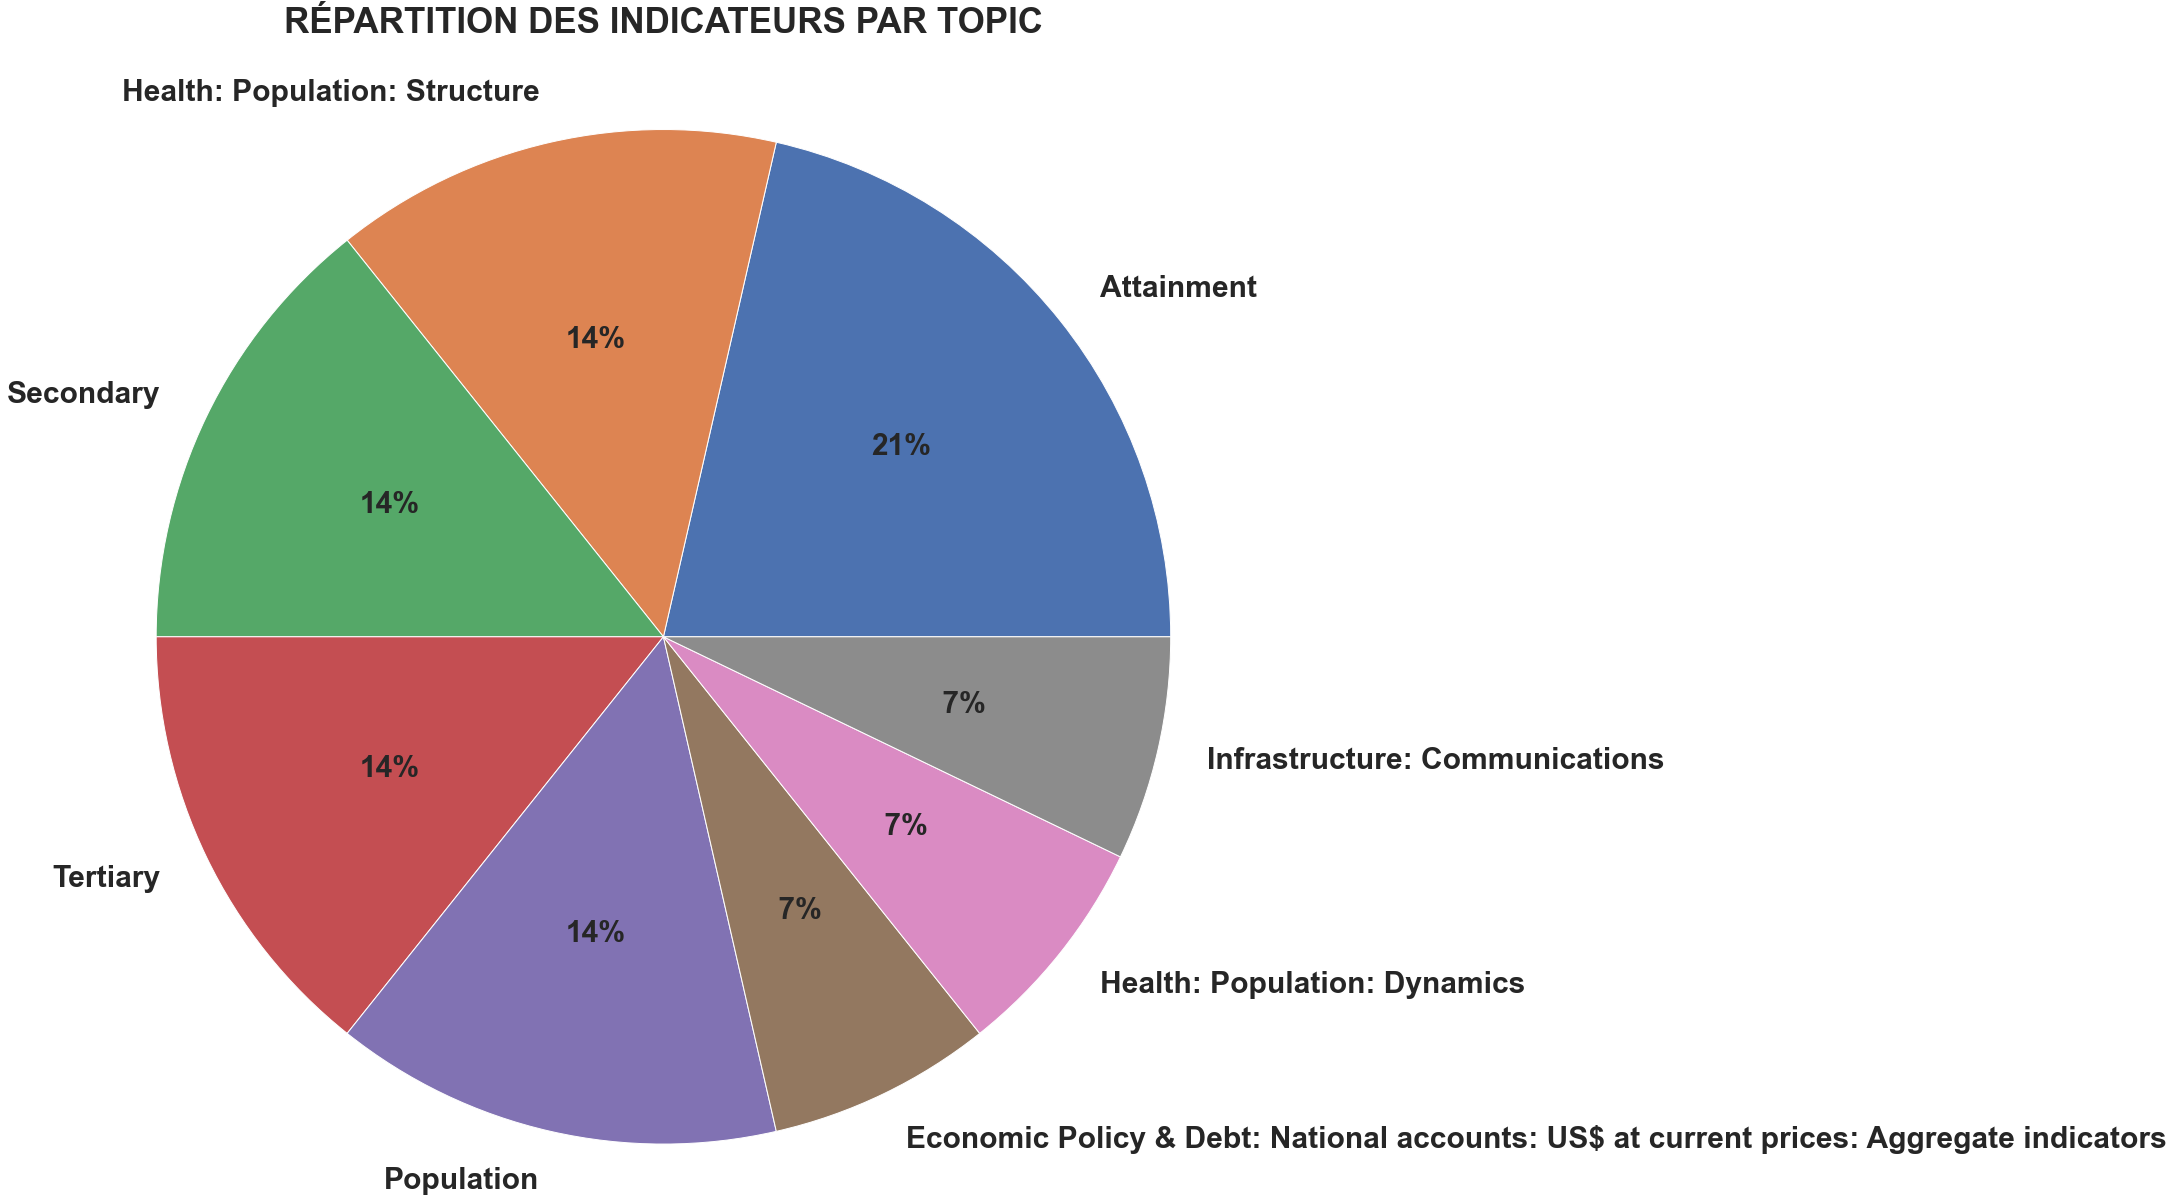

In [89]:
pf.plotRepartitionTopics(total_data_df, 20, 20)

### Représentation visuelle du taux de replissage des indicateurs définitifs sélectionnés

C:\Users\RaissaTomeba\Formation\project_functions.py:130: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(b.get_xticks(), size = Y_SIZE)
C:\Users\RaissaTomeba\Formation\project_functions.py:140: UserWarning: FixedFormatter should only be used together with FixedLocator
  c.set_xticklabels(c.get_xticks(), size = Y_SIZE)


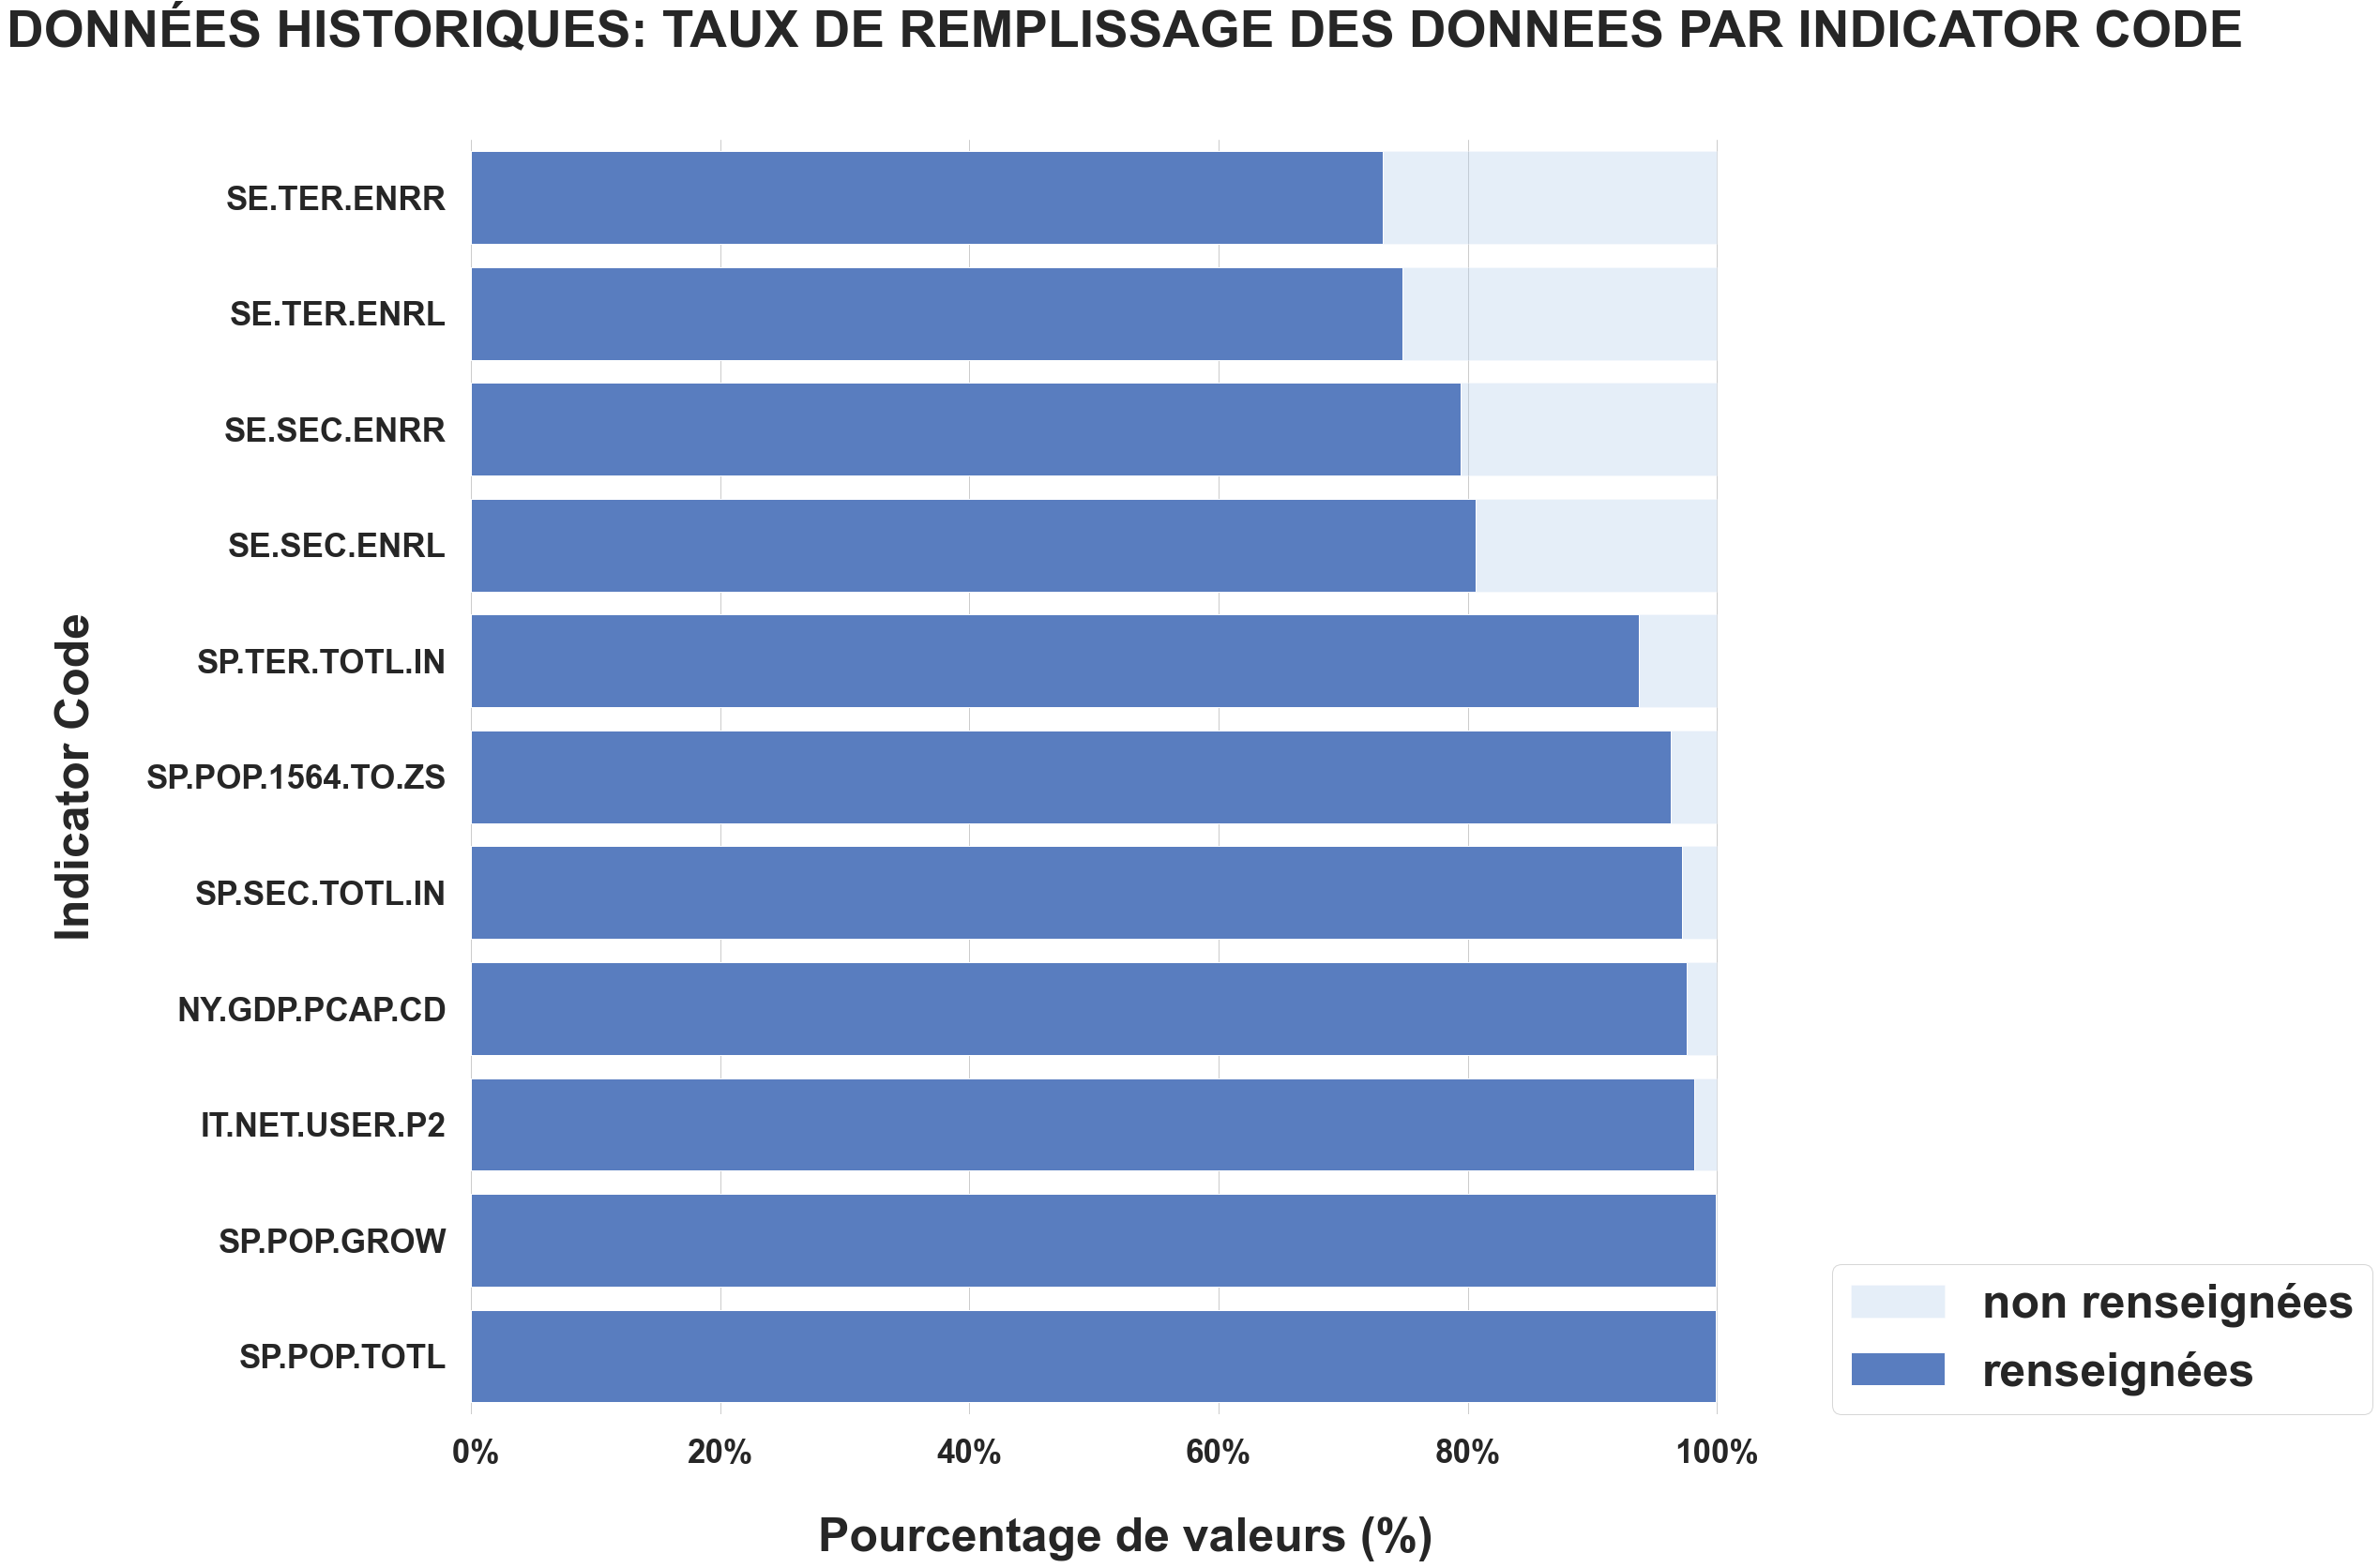

In [90]:
pf.plotTauxRemplissage(final_historical_data_df, "Indicator Code", 25, 25,"Données Historiques")

C:\Users\RaissaTomeba\Formation\project_functions.py:130: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(b.get_xticks(), size = Y_SIZE)
C:\Users\RaissaTomeba\Formation\project_functions.py:140: UserWarning: FixedFormatter should only be used together with FixedLocator
  c.set_xticklabels(c.get_xticks(), size = Y_SIZE)


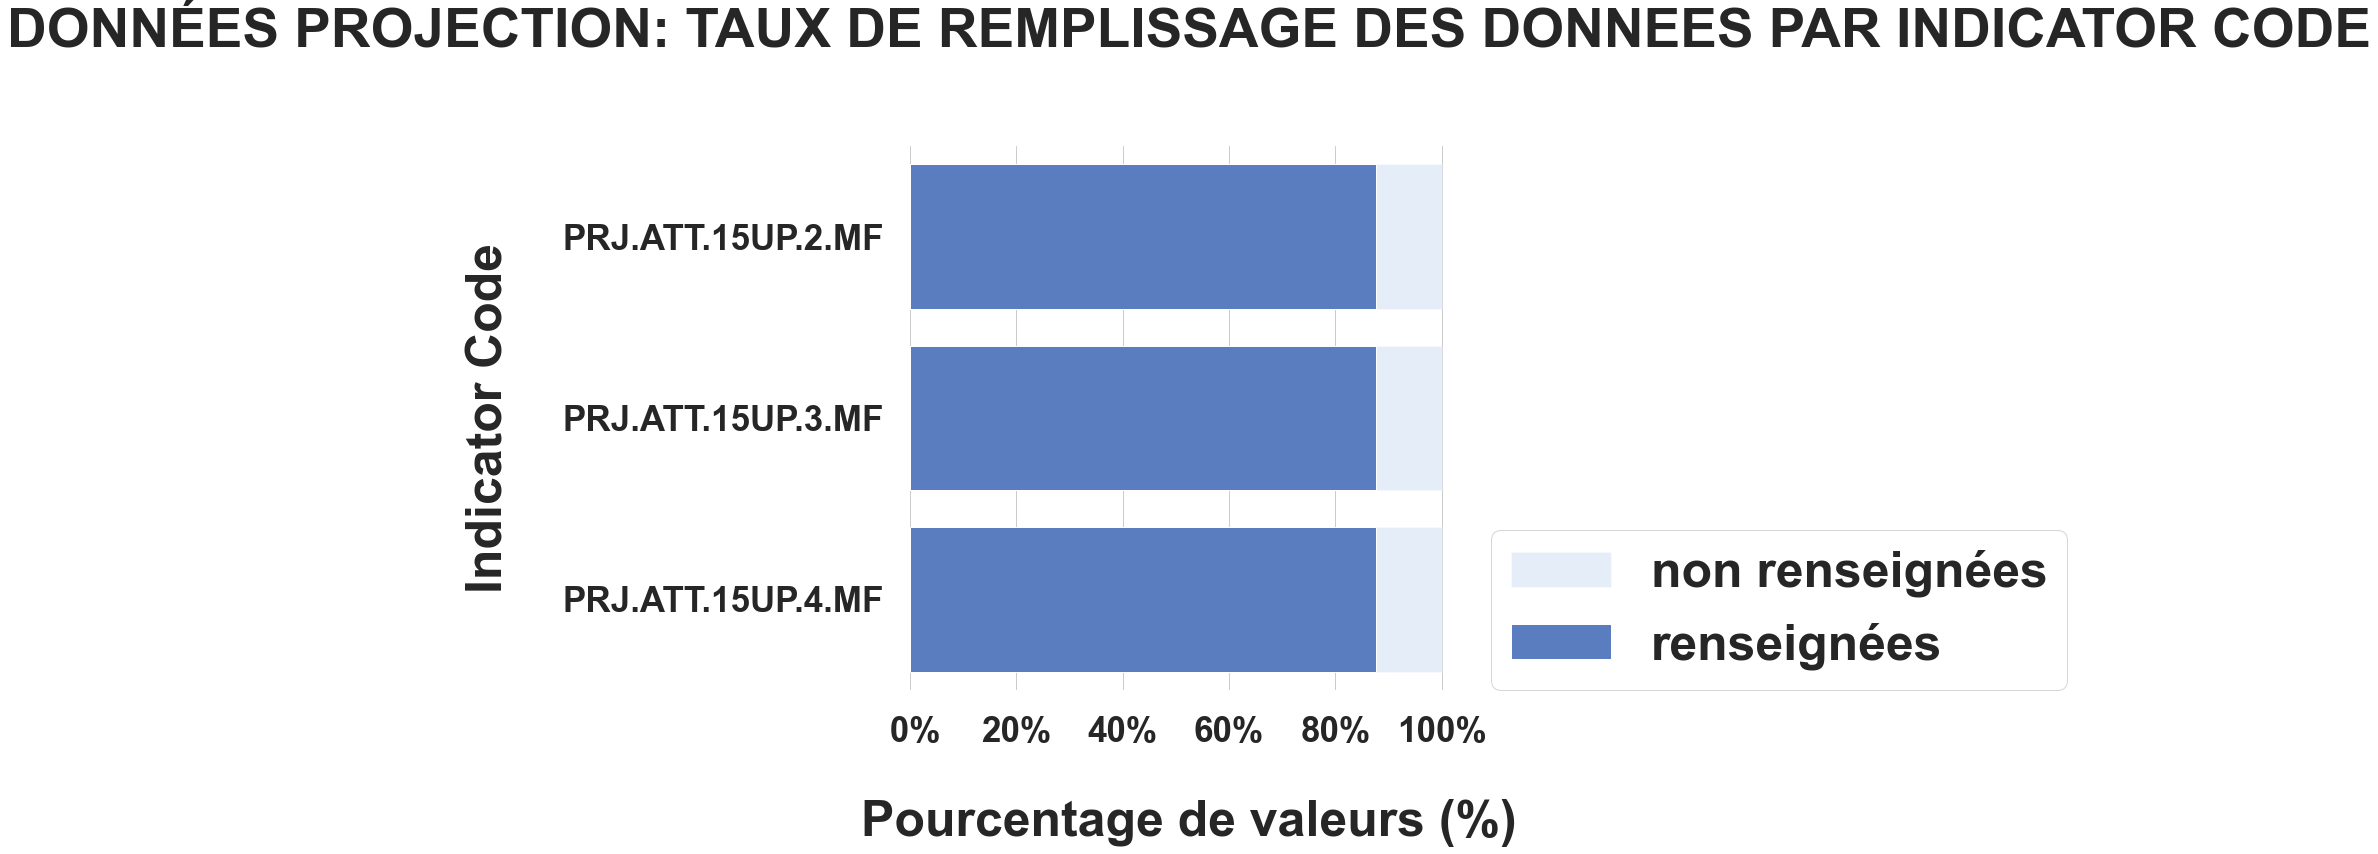

In [91]:
pf.plotTauxRemplissage(final_projection_data_df, "Indicator Code", 10, 10,"Données Projection")

## Conclusion

Nous avons sélectionné les indicateurs les plus pertinents (en fonction de la problématique métier) et nous avons retenu uniquement les pays ayant un taux de remplissage de données suppérieur à 30%

Désormais, les dataframes qui seront utilsé pour l'analyse sont
- **final_historical_data_df** : données historiques 
- **final_projection_data_df**: données de projection 

Les indicateurs sélectionnés couvrent l'ensemble des domaines d'intérêt pour la démarche et sont suffisamment renseignés pour pouvoir répondre aux problématiques posées.

# 5. EDITION DE GRAPHIQUES ET ANALYSE METIER

**Besoin métier**

Voici la liste des questions d'intérêt pour l'entreprise:
- Quels sont les pays avec un fort potentiel de clients pour les services de l’entreprise ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?


Pour chaque pays, les indicateurs que nous avons sélectionnés donnent des informations sur:
- la démographie
- l'économie (PIB/Habitant)
- le niveau d'éducation (nombre et taux étudiants dans le secondaire et tertiaire)
- le déploiement internet (taux utilisation internet)

**Notre démarche**

Après avoir restreint les données historiques et de projection aux indicateurs et pays définitifs sélectionnés,
nous allons maintenant mettre en place un système de **scoring**. Voici notre démarche :

-	Normaliser (avec la normalisation min-max) les valeurs de chaque indicateur (pour tous les pays) par années. Nous construisons un dataframe **df_data_changed_norm** dans lequel on a les colonnes suivantes : Country Code, Country Name, Region, Year, listIndicators (listIndicators correspond à une colonne par indicateur). Les valeurs dans ce dataframe correspondent aux valeurs normalisées des indicateurs par année. Rappel de la formule de normalisation min-max **val_norm = (val-min)/(max-min)**
-	Ajouter d’une colonne «Score » à **df_data_changed_norm** qui contient la somme des valeurs de chaque ligne. **df_data_changed_norm** contient désormais un score par pays et par année

A partir de **df_data_changed_norm** on peut dériver les scores groupés par pays ou par région. Nous allons donc utiliser ce dataframe pour éditer des graphiques afin de répondre aux 3 questions métier.



- attribuer un **poids** aux 11 indicateurs de description sélectionné. Par défaut tous les indicateurs auront le même poids **1/11**. Ces poids indiquent la pertinence des indicateurs d'un point de vue métier. Ils pourraient donc être modifiés par un expert métier pour affiner le scoring.

- Taux d'utilisation d'internet par pays (taux global ou évolution du taux au fil des années ?)
- Classement des pays contenant le plus de lycéens et d'étudiant
- Classement des pays par PIB/Habitant décroissant
- Evolution du taux de croissance de la population par pays au fil des ans
- 

___
## 5.1 Mise en place du scoring (attribution d'un score par pays)

Cette partie est focalisée sur les donnée historiques

___
### 5.1.1 Normalisation min-max des valeurs de chaque indicateur (pour tous les pays) par années.
Nous avons écrit une fonction qui prend en paramètre une dataframe (final_historical_data_df ou final_projection_data_df) et une liste de d'indicateurs (final_inds_desc ou final_inds_prj) et qui retourne une dataframe contenant les valeurs normalisée de chaque indicateur (de la liste d'indicateurs considérée) par année.


In [92]:
historical_data_norm_df = pf.normalisationMinMax(final_historical_data_df, final_inds_desc)

In [93]:
historical_data_norm_df

Country Code        Country Name                      Region  Year  \
0             AFG         Afghanistan                  South Asia  2000   
1             ALB             Albania       Europe & Central Asia  2000   
2             DZA             Algeria  Middle East & North Africa  2000   
3             AND             Andorra       Europe & Central Asia  2000   
4             AGO              Angola          Sub-Saharan Africa  2000   
...           ...                 ...                         ...   ...   
3179          VNM             Vietnam         East Asia & Pacific  2015   
3180          PSE  West Bank and Gaza  Middle East & North Africa  2015   
3181          YEM         Yemen, Rep.  Middle East & North Africa  2015   
3182          ZMB              Zambia          Sub-Saharan Africa  2015   
3183          ZWE            Zimbabwe          Sub-Saharan Africa  2015   

      NY.GDP.PCAP.CD  SP.POP.GROW  SP.POP.TOTL  SP.POP.1564.TO.ZS  \
0                NaN     0.756326     0.015907           0.070767   
1           0.014120     0.263837     0.002439           0.598390   
2           0.021921     0.500667     0.024690           0.548695   
3           0.292785     0.527187     0.000044                NaN   
4           0.005791     0.701295     0.013014           0.107901   
...              ...          ...          ...                ...   
3179        0.010762     0.426116     0.066877           0.603811   
3180        0.015283     0.647829     0.003217           0.254085   
3181        0.006561     0.599242     0.019622           0.245583   
3182        0.006037     0.659774     0.011734           0.128224   
3183        0.004366     0.578265     0.011498           0.222752   

      IT.NET.USER.P2  SP.SEC.TOTL.IN  SP.TER.TOTL.IN  SE.SEC.ENRL  \
0                NaN        0.016807        0.017863          NaN   
1           0.002194        0.003239        0.002604     0.004475   
2           0.009456        0.029342        0.034888     0.036733   
3           0.202670             NaN             NaN          NaN   
4           0.002020        0.016336        0.015052     0.004344   
...              ...             ...             ...          ...   
3179        0.436202        0.053539        0.071583          NaN   
3180        0.579397        0.004955        0.004159     0.005559   
3181        0.236546        0.021106             NaN          NaN   
3182        0.204816        0.010391             NaN          NaN   
3183        0.222739        0.011684        0.013438          NaN   

      SE.SEC.ENRR  SE.TER.ENRL  SE.TER.ENRR  
0             NaN          NaN          NaN  
1        0.417804     0.003025     0.186632  
2        0.374834          NaN          NaN  
3             NaN          NaN          NaN  
4        0.049460          NaN          NaN  
...           ...          ...          ...  
3179          NaN     0.056867     0.260507  
3180     0.426174     0.005085     0.433860  
3181          NaN          NaN          NaN  
3182          NaN          NaN          NaN  
3183          NaN     0.003115     0.031551  

[3184 rows x 15 columns]

___
### 5.1.2 Calcul du score par pays et par année

Ajout d’une colonne «Score » à **historical_data_norm_df** et **projection_data_norm_df** qui contient la somme des valeurs de chaque ligne. 

In [94]:
historical_data_norm_score_df = historical_data_norm_df.copy()
#Poids des indicateurs
#Si on suppose que tous les indicateurs ont la même importance
indicators_weight1 = [1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11]
#Si on donne des poids différents aux indicateurs
indicators_weight2 = [1.5/11, 0.4/11, 0.4/11, 0.4/11, 2.5/11, 0.4/11, 0.4/11, 1.25/11, 1.25/11, 1.25/11, 1.25/11]

part1_df = historical_data_norm_score_df.iloc[:,0:4]
#multiplication des valeurs normalisées des indicateurs par les poids
part2_df = historical_data_norm_score_df.iloc[:,4:]*indicators_weight1

historical_data_norm_score_df = pd.concat([part1_df, part2_df], axis=1)
historical_data_norm_score_df['Score'] = historical_data_norm_score_df.sum(axis=1)

In [95]:
historical_data_norm_score_df

Country Code        Country Name                      Region  Year  \
0             AFG         Afghanistan                  South Asia  2000   
1             ALB             Albania       Europe & Central Asia  2000   
2             DZA             Algeria  Middle East & North Africa  2000   
3             AND             Andorra       Europe & Central Asia  2000   
4             AGO              Angola          Sub-Saharan Africa  2000   
...           ...                 ...                         ...   ...   
3179          VNM             Vietnam         East Asia & Pacific  2015   
3180          PSE  West Bank and Gaza  Middle East & North Africa  2015   
3181          YEM         Yemen, Rep.  Middle East & North Africa  2015   
3182          ZMB              Zambia          Sub-Saharan Africa  2015   
3183          ZWE            Zimbabwe          Sub-Saharan Africa  2015   

      NY.GDP.PCAP.CD  SP.POP.GROW  SP.POP.TOTL  SP.POP.1564.TO.ZS  \
0                NaN     0.068757     0.001446           0.006433   
1           0.001284     0.023985     0.000222           0.054399   
2           0.001993     0.045515     0.002245           0.049881   
3           0.026617     0.047926     0.000004                NaN   
4           0.000526     0.063754     0.001183           0.009809   
...              ...          ...          ...                ...   
3179        0.000978     0.038738     0.006080           0.054892   
3180        0.001389     0.058894     0.000292           0.023099   
3181        0.000596     0.054477     0.001784           0.022326   
3182        0.000549     0.059979     0.001067           0.011657   
3183        0.000397     0.052570     0.001045           0.020250   

      IT.NET.USER.P2  SP.SEC.TOTL.IN  SP.TER.TOTL.IN  SE.SEC.ENRL  \
0                NaN        0.001528        0.001624          NaN   
1           0.000199        0.000294        0.000237     0.000407   
2           0.000860        0.002667        0.003172     0.003339   
3           0.018425             NaN             NaN          NaN   
4           0.000184        0.001485        0.001368     0.000395   
...              ...             ...             ...          ...   
3179        0.039655        0.004867        0.006508          NaN   
3180        0.052672        0.000450        0.000378     0.000505   
3181        0.021504        0.001919             NaN          NaN   
3182        0.018620        0.000945             NaN          NaN   
3183        0.020249        0.001062        0.001222          NaN   

      SE.SEC.ENRR  SE.TER.ENRL  SE.TER.ENRR     Score  
0             NaN          NaN          NaN  0.079788  
1        0.037982     0.000275     0.016967  0.136251  
2        0.034076          NaN          NaN  0.143748  
3             NaN          NaN          NaN  0.092971  
4        0.004496          NaN          NaN  0.083201  
...           ...          ...          ...       ...  
3179          NaN     0.005170     0.023682  0.180570  
3180     0.038743     0.000462     0.039442  0.216327  
3181          NaN          NaN          NaN  0.102605  
3182          NaN          NaN          NaN  0.092816  
3183          NaN     0.000283     0.002868  0.099946  

[3184 rows x 16 columns]

### 5.1.3 Calcul du score par pays (moyenne des scores par année de chaque pays)

In [96]:
historical_data_norm_score_by_country_df = historical_data_norm_score_df.groupby('Country Name').agg('mean').reset_index()

#Ajout de la colonne Region
data = final_historical_data_df
country_list = data['Country Name'].unique()
region_list = []
for country in country_list:
    region_list.append(data[data['Country Name'] == country]['Region'].unique()[0])
historical_data_norm_score_by_country_df.insert(0, 'Region', region_list)

In [97]:
#Affichage par score décroissant (données historiques)
historical_data_norm_score_by_country_df.sort_values(by='Score', ascending=False)

Region              Country Name  NY.GDP.PCAP.CD  \
38     East Asia & Pacific                     China        0.002271   
80              South Asia                     India        0.000556   
189          North America             United States        0.035111   
133  Europe & Central Asia                    Norway        0.053841   
94     East Asia & Pacific               Korea, Rep.        0.014401   
..                     ...                       ...             ...   
57      Sub-Saharan Africa                   Eritrea        0.000125   
131     Sub-Saharan Africa                     Niger        0.000075   
161     Sub-Saharan Africa                   Somalia        0.000062   
184    East Asia & Pacific                    Tuvalu        0.001738   
35      Sub-Saharan Africa  Central African Republic        0.000132   

     SP.POP.GROW  SP.POP.TOTL  SP.POP.1564.TO.ZS  IT.NET.USER.P2  \
38      0.023209     0.090909           0.065461        0.022247   
80      0.030886     0.081589           0.041459        0.006916   
189     0.025691     0.020807           0.050850        0.070007   
133     0.025919     0.000329           0.048418        0.088156   
94      0.023184     0.003373           0.067337        0.078612   
..           ...          ...                ...             ...   
57      0.037503     0.000276           0.018747        0.000346   
131     0.049972     0.001043           0.001587        0.000590   
161     0.043136     0.000776           0.006021        0.000785   
184     0.026955     0.000000                NaN        0.024887   
35      0.029620     0.000291           0.016312        0.001171   

     SP.SEC.TOTL.IN  SP.TER.TOTL.IN  SE.SEC.ENRL  SE.SEC.ENRR  SE.TER.ENRL  \
38     6.977513e-02        0.087143     0.082502     0.045710     0.084805   
80     9.090909e-02        0.087941     0.086612     0.032395     0.063096   
189    1.372055e-02        0.016806     0.021865     0.057699     0.068393   
133    1.970952e-04        0.000234     0.000366     0.069356     0.000855   
94     2.147410e-03        0.002798     0.003406     0.057667     0.012778   
..              ...             ...          ...          ...          ...   
57     3.890843e-04        0.000370     0.000188     0.012608     0.000029   
131    1.132721e-03        0.000824     0.000223     0.000203     0.000047   
161    6.598139e-04        0.000619     0.000075     0.000000          NaN   
184    6.708430e-09        0.000000     0.000000     0.039427          NaN   
35     3.622046e-04        0.000316     0.000083     0.002296     0.000032   

     SE.TER.ENRR     Score  
38      0.019168  0.577174  
80      0.013590  0.535950  
189     0.076667  0.452644  
133     0.068579  0.356249  
94      0.084155  0.349858  
..           ...       ...  
57      0.000779  0.056564  
131     0.000465  0.055866  
161          NaN  0.051926  
184          NaN  0.051640  
35      0.001249  0.049548  

[199 rows x 14 columns]

___
## 5.2 Graphiques 

Nous avons désormais des scores par pays (calculés à partir des moyennes des valeurs normalisées des indicateurs définitifs sélectionnés). Nous pouvons maintenant éditer des graphiques pour répondre aux 3 questions métier.

___
### 5.2.1 Box plot des scores par région 

**Observations**
- Les régions **North America** et **Europe & Central Asia** semblent se démarquer des autres régions.
- On observe des outliers (pays avec un score qui se démarque par rapport aux autres pays de la région) 
  pour les régions **East Asia & Pacific**, **South Asia** et **Sub-Saharan Africa**  

In [111]:
sns.set(style="darkgrid") #pour des graphe un peu plus beaux

Text(0.5, 0.98, '')

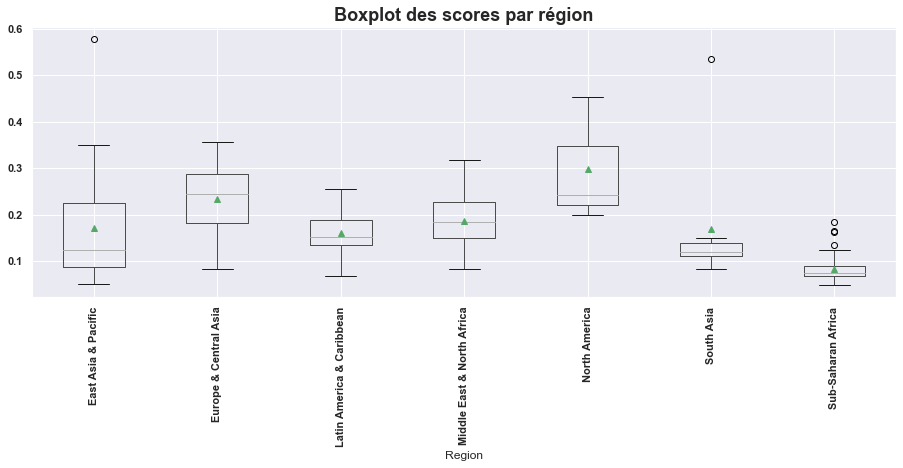

In [99]:
historical_data_norm_score_by_country_df.boxplot('Score', 'Region', figsize=(15, 5), rot=90, showmeans=True)
plt.title("Boxplot des scores par région", fontsize="18", fontweight='bold')
plt.suptitle('')

___
### 5.2.2 Pie plot de la répartition du potentiel par région (basé sur les scores) 
L'hypotèse émise avec le boxplot du score par région sur la démarquation des régions **North America** et **Europe & entral Asia** se confirme

Text(0.5, 1.0, 'REPARTITION DU POTENTIEL PAR REGION')

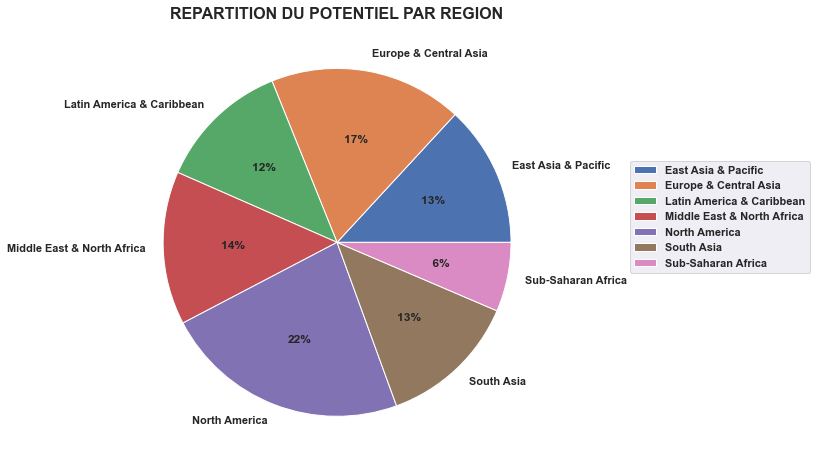

In [100]:
historical_data_norm_score_by_country_df.groupby('Region').agg('mean').plot.pie(y='Score',autopct=lambda x:'{:2d}'.format(int(x)) + '%', figsize=(8, 8), normalize=True)
plt.legend(bbox_to_anchor=(1.1,-0.3,0.5,1))
plt.ylabel('')
plt.title('REPARTITION DU POTENTIEL PAR REGION', fontsize=16, fontweight="bold")

___
### 5.2.3 Bar plot des scores par pays regroupés par région 

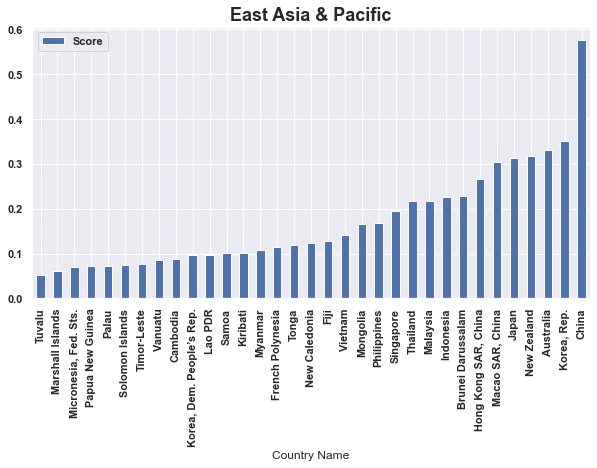

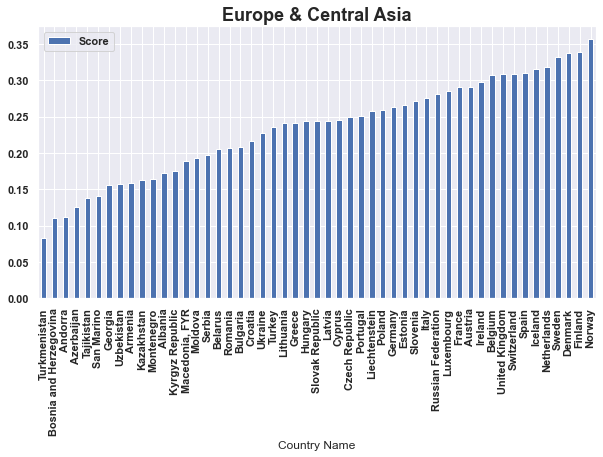

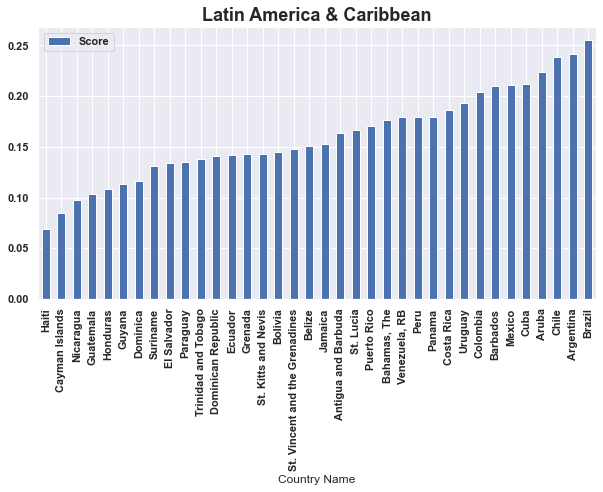

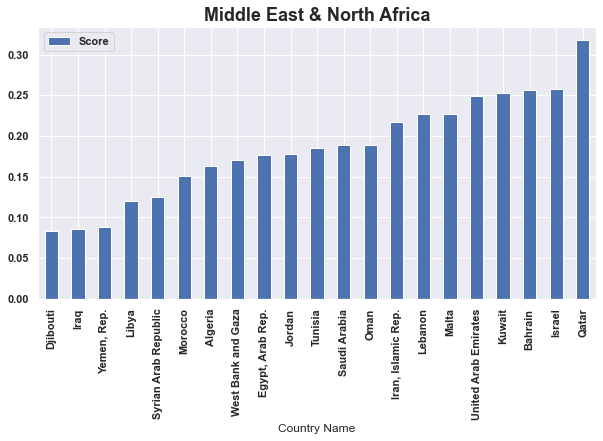

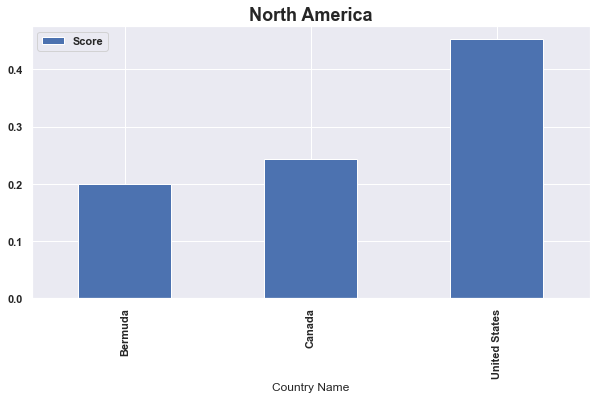

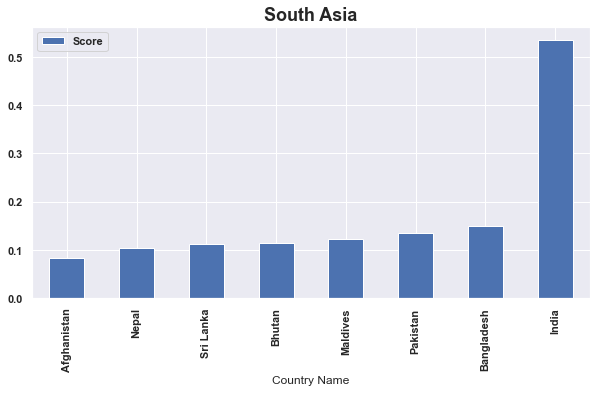

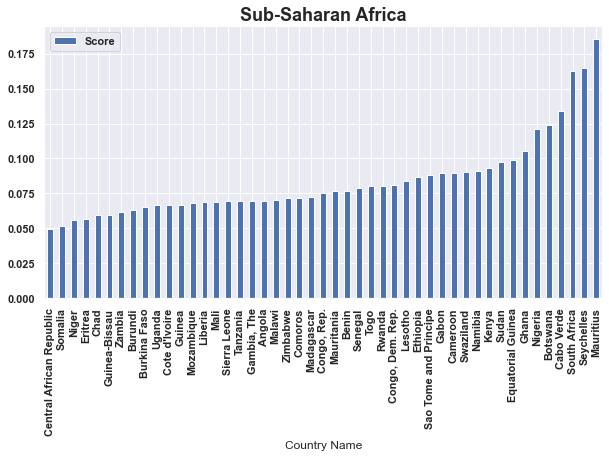

In [101]:
for title, group in historical_data_norm_score_by_country_df.sort_values(by='Score').groupby('Region'):
    group.plot.bar(y='Score', x='Country Name', figsize=(10, 5))
    plt.title(title, fontsize='18', fontweight='bold')

___
### 5.2.4 Bar plot des scores des 10 premiers pays à fort potientiel (pays ayant les scores les plus élevés) 

Les **10 pays ayant les scores les plus élevés** sont:
- China
- India
- United States
- Norway
- Korea, Rep.
- Filand
- Danmark
- Sweden
- Australia
- Netherlands

Le taux de remplissage des données sur les indicateurs définitifs sélectionnés pour ces 10 pays approche les 100% ce qui crédibilise les scores obtenus  

Text(0.5, 1.0, 'SCORES DES 10 TOP PAYS')

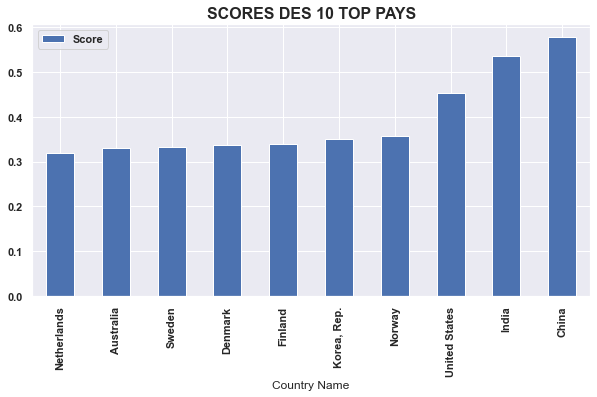

In [102]:
#Sélection des 10 pays ayant les scores les plus élevés
top_country = historical_data_norm_score_by_country_df.sort_values(by='Score', ascending=False).head(10)['Country Name']
top_country_score_df = historical_data_norm_score_by_country_df[historical_data_norm_score_by_country_df['Country Name'].isin(top_country)]

#barplot du score
top_country_score_df.sort_values(by='Score').plot.bar(y='Score', x='Country Name', figsize=(10, 5))
plt.title("SCORES DES 10 TOP PAYS", fontsize='16', fontweight='bold')

### Taux de remplissage pour ces 10 pays ayant les scores les plus élevés 

C:\Users\RaissaTomeba\Formation\project_functions.py:130: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(b.get_xticks(), size = Y_SIZE)
C:\Users\RaissaTomeba\Formation\project_functions.py:140: UserWarning: FixedFormatter should only be used together with FixedLocator
  c.set_xticklabels(c.get_xticks(), size = Y_SIZE)


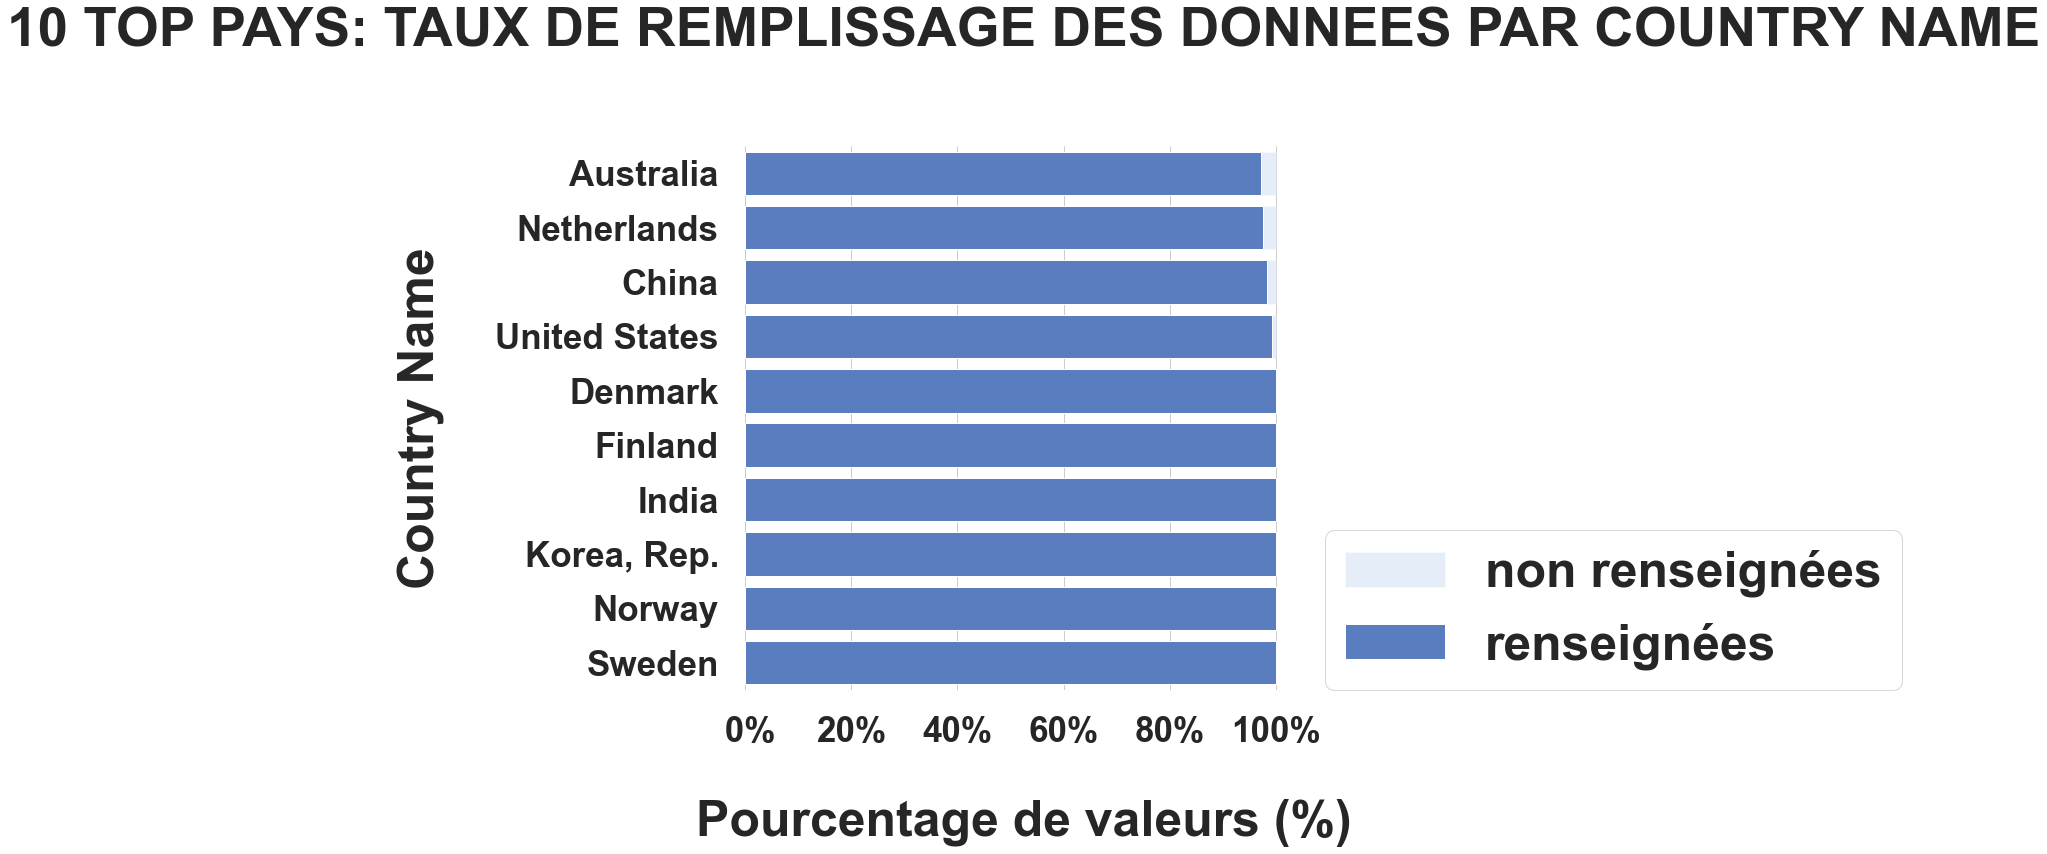

In [103]:
top_country_df = final_historical_data_df[final_historical_data_df['Country Name'].isin(top_country)]
pf.plotTauxRemplissage(top_country_df, "Country Name", 10, 10,"10 TOP PAYS")

___
### 5.2.5 Line plot de l'évolution du score (sur les années) pour les 10 top pays
- L'Inde semble être le pays ayant l'évolution la plus prometteuse
- L'évolution de la Chine est également interessante
- Tendance stable pour la plupart des pays mais décroissante pour United States

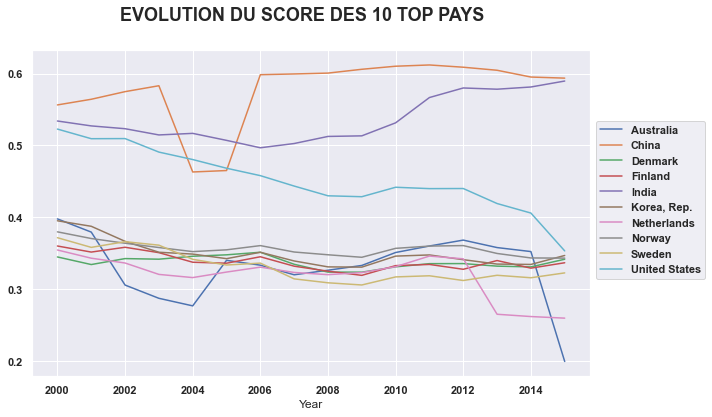

In [112]:
top_country_year_df = historical_data_norm_score_df[historical_data_norm_score_df['Country Name'].isin(top_country)]
fig,ax = plt.subplots(figsize=(10,6))
fig.suptitle('EVOLUTION DU SCORE DES 10 TOP PAYS', fontsize=18, fontweight='bold')
for label, df in top_country_year_df.groupby('Country Name'):
    df.plot.line(x='Year', y='Score', ax=ax, label=label)
plt.legend(bbox_to_anchor=(1,-0.2,0.1,1))

___
### 5.2.6 Line plot de l'évolution des indicateurs de projection (sur les années) pour les 10 top pays

**Rappel des indicateurs de projection**
- **PRJ.ATT.15UP.2.MF**: Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Lower Secondary. Total
- **PRJ.ATT.15UP.3.MF**: Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Upper Secondary. Total	
- **PRJ.ATT.15UP.4.MF**: Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Post Secondary. Total

Les graphiques montrent que pour tous les 10 top pays, la tendance de l'évolution de la population de plus de 15 ans ayant atteint le niveau "Post Secondary" sera croissante.

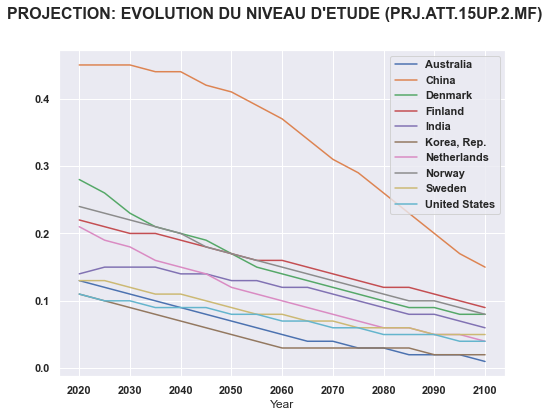

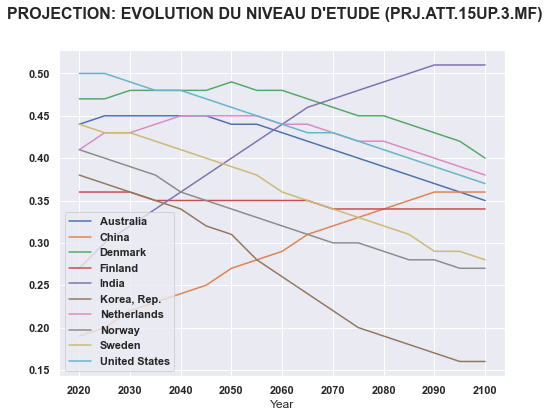

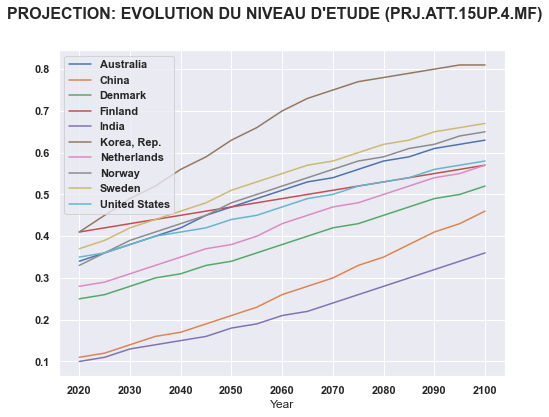

In [113]:
pf.plotIndicateursProjection(final_projection_data_df, final_inds_prj, top_country)

___
### 5.2.7 Bar plot du nombre de lycéens et d'étudiants pour les 10 top pays

Text(0.5, 1.0, "NOMBRE MOYEN D'INSCRIPTION NIVEAU LYCEE ET UNIVERSITE POUR LES 10 TOP PAYS")

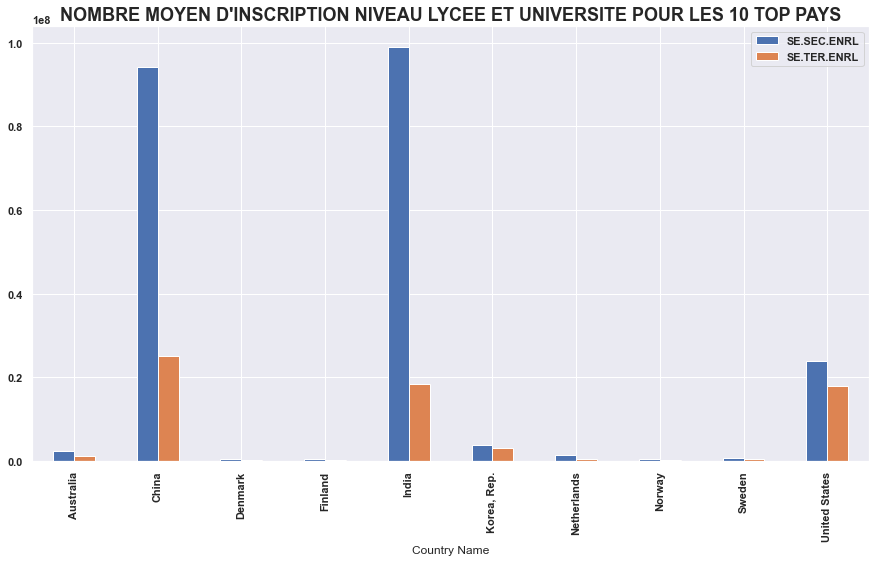

In [114]:
df_data_changed =  pf.dataframeChange(final_historical_data_df, final_inds_desc)
df_data_changed_by_country = df_data_changed.groupby('Country Name').agg('mean').reset_index()

#Ajout de la colonne Region
data = final_historical_data_df
country_list = data['Country Name'].unique()
region_list = []
for country in country_list:
    region_list.append(data[data['Country Name'] == country]['Region'].unique()[0])
df_data_changed_by_country.insert(0, 'Region', region_list)


#for title, group in df_data_changed_by_country.groupby('Region'):
#    group.plot.bar(y=['SE.SEC.ENRR', 'SE.TER.ENRR'], x='Country Name', figsize=(15, 8), title=title)

top_country_sec_ter_df = df_data_changed_by_country[df_data_changed_by_country['Country Name'].isin(top_country)]
top_country_sec_ter_df.plot.bar(y=['SE.SEC.ENRL', 'SE.TER.ENRL'], x='Country Name', figsize=(15, 8))  
plt.title("NOMBRE MOYEN D'INSCRIPTION NIVEAU LYCEE ET UNIVERSITE POUR LES 10 TOP PAYS", fontsize='18', fontweight='bold')

___
### 5.2.8 Bar plot du nombre d'utilisateurs d'internet pour 100 personnes (10 top pays) 

Text(0.5, 1.0, "NOMBRE D'UTILISATEUR D'INTERNET POUR 100 PERSONNES (10 TOP PAYS)")

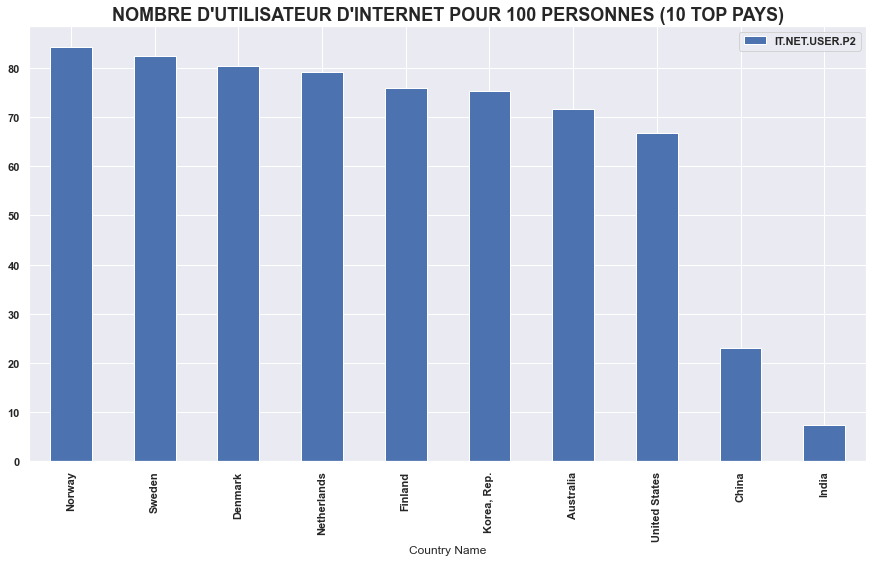

In [115]:
top_country_sec_ter_df.sort_values(by='IT.NET.USER.P2', ascending=False).plot.bar(y='IT.NET.USER.P2', x='Country Name', figsize=(15, 8))  
plt.title("NOMBRE D'UTILISATEUR D'INTERNET POUR 100 PERSONNES (10 TOP PAYS)", fontsize='18', fontweight='bold')

___
### 5.2.9 Bar plot du PIB/Habitant (10 top pays)

Text(0.5, 1.0, 'PIB/HABITANT (10 TOP PAYS)')

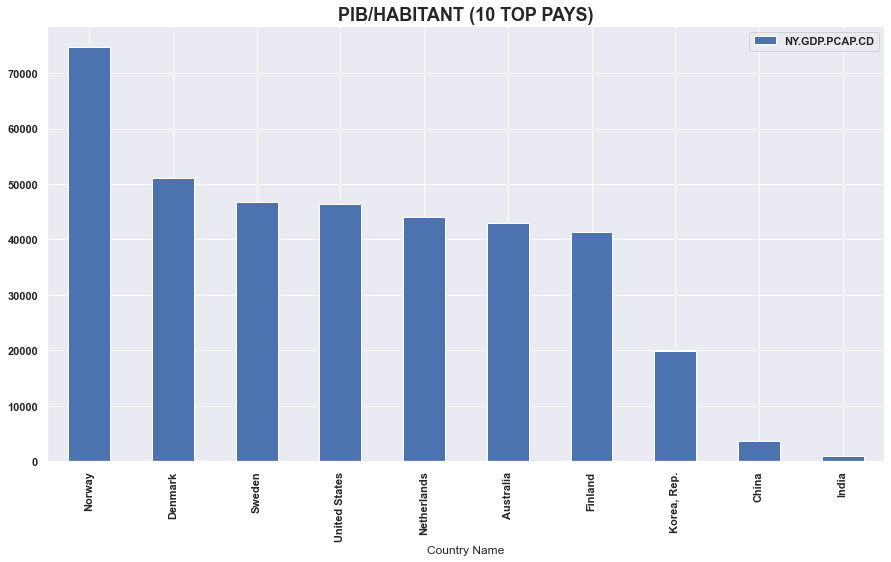

In [116]:
top_country_sec_ter_df.sort_values(by='NY.GDP.PCAP.CD', ascending=False).plot.bar(y='NY.GDP.PCAP.CD', x='Country Name', figsize=(15, 8))  
plt.title("PIB/HABITANT (10 TOP PAYS)", fontsize='18', fontweight='bold')

___
### 5.2.10 Bar plot du Population Totale (10 top pays)

Text(0.5, 1.0, 'POPULATION TOTALE (10 TOP PAYS)')

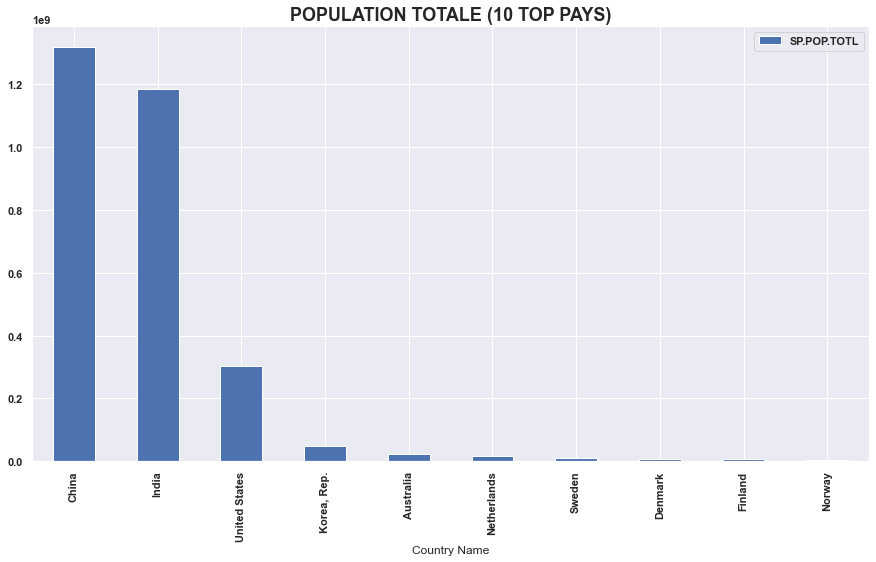

In [117]:
top_country_sec_ter_df.sort_values(by='SP.POP.TOTL', ascending=False).plot.bar(y='SP.POP.TOTL', x='Country Name', figsize=(15, 8))  
plt.title("POPULATION TOTALE (10 TOP PAYS)", fontsize='18', fontweight='bold')

# CONCLUSION GENERALE
**Question 1: Quels sont les pays avec un fort potentiel de clients pour les services de l’entreprise ?**
- Les valeurs du score par pays suggèrent que les 10 premiers pays avec un fort potentiel de clients sont:
    * China
    * India
    * United States
    * Norway
    * Korea, Rep.
    * Filand
    * Danmark
    * Sweden
    * Australia
    * Netherlands
- Cependant une prise en compte plus fine de l'importance de chaque indicateur définitif sélectionné pour le calcul du score pourraient conduire à une obtention de résultats différents. En effet, ici nous avons considérés que tous les indicateurs avaient la même importance. Mais dans la réalité (avec la connaissance de l'expertise métier), on pourrait attribuer un **poids** à chaque indicateur parmi les 11 indicateurs de description sélectionnés qui indiqueraient la pertinence de l'indicateur d'un point de vue métier. Ainsi le calcul du score serait désormais la somme des moyennes des valeurs normalisées par indicateur multipliée par les poids des indicateurs. 
- En effet, le**s scores élevés pour la Chine et l'Inde semblent être beaucoup plus liés aux indicateurs relatifs à la démographie**. Les graphiques montrent que le nombre de lycéens et d'étudiant des plus élevé pour ces 2 pays, cependant, le nombre d'utilisateur d'internet/100 personnes et le PIB/Habitant sont bas par rapport aux autres top pays. 

**Question 2: Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?**

Les graphique réalisés à la section 5.2.5 montrent:
- un line plot de l'évolution du score (sur les années) pour les 10 top pays: la tendance est plutôt stable ou à baisse pour la plupart des pays excepté pour l'Inde qui semblent avoir une tendance d'évolution croissante.
- un line plot des projections sur l'évolution du niveau d'étude des niveux lower secondary, upper secondary et post secondary: pour tous les 10 top pays, la tendance de l'évolution de la population de plus de 15 ans ayant atteint le niveau "Post Secondary" est croissante. 

**Question 3: Dans quels pays l'entreprise doit-elle opérer en priorité ?**
Pour apporter la réponse la plus pertinente pour cette question, il serait intéressant d'affiner le système de scoring mis en place (comme expliqué plus haut) afin que les scores soit le plus proche possible des connaissance métier. Si l'on s'arrête à ce que nous avons proposé, l'entreprise devrait opérer en priorité dans le pays avec les scores les plus élevés. Par exemple:
- China
- india
- United States
